# W2D1: Linear Systems

## Tutorial 1: Linear Dynamical Systems

In this tutorial, we will be learning about behavior of dynamical systems -- systems that evolve in time -- where the rules by which they evolve in time are described precisely by a differential equation.

Differential equations are equations that express the **rate of change** of the state variable $x$. One typically describes this rate of change using the derivative of $x$ with respect to time ($dx/dt$) on the left hand side of the differential equation:

\begin{equation}
\frac{dx}{dt} = f(x)
\end{equation}

A common notational short-hand is to write $\dot{x}$ for $\frac{dx}{dt}$. The dot means "the derivative with respect to time".

Today, the focus will be on **linear dynamics**, where $f(x)$ is a linear function of $x$. In Tutorial 1, we will:

* Explore and understand the behavior of such systems where $x$ is a single variable
* Consider cases where $\mathbf{x}$ is a state vector representing two variables.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver

In [2]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
def plot_trajectory(system, params, initial_condition, dt=0.1, T=6,
                    figtitle=None):

  """
  Shows the solution of a linear system with two variables in 3 plots.
  The first plot shows x1 over time. The second plot shows x2 over time.
  The third plot shows x1 and x2 in a phase portrait.

  Args:
    system (function): a function f(x) that computes a derivative from
                        inputs (t, [x1, x2], *params)
    params (list or tuple): list of parameters for function "system"
    initial_condition (list or array): initial condition x0
    dt (float): time step of simulation
    T (float): end time of simulation
    figtitlte (string): title for the figure

  Returns:
    nothing, but it shows a figure
  """

  # time points for which we want to evaluate solutions
  t = np.arange(0, T, dt)

  # Integrate
  # use built-in ode solver
  solution = solve_ivp(system,
                    t_span=(0, T),
                    y0=initial_condition, t_eval=t,
                    args=(params),
                    dense_output=True)
  x = solution.y

  # make a color map to visualize time
  timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

  # make a large figure
  fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
  fig.set_size_inches(10, 3)

  # plot x1 as a function of time
  ah1.scatter(t, x[0,], color=timecolors)
  ah1.set_xlabel('time')
  ah1.set_ylabel('x1', labelpad=-5)

  # plot x2 as a function of time
  ah2.scatter(t, x[1], color=timecolors)
  ah2.set_xlabel('time')
  ah2.set_ylabel('x2', labelpad=-5)

  # plot x1 and x2 in a phase portrait
  ah3.scatter(x[0,], x[1,], color=timecolors)
  ah3.set_xlabel('x1')
  ah3.set_ylabel('x2', labelpad=-5)
  #include initial condition is a blue cross
  ah3.plot(x[0,0], x[1,0], 'bx')

  # adjust spacing between subplots
  plt.subplots_adjust(wspace=0.5)

  # add figure title
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_streamplot(A, ax, figtitle=None, show=True):
  """
  Show a stream plot for a linear ordinary differential equation with
  state vector x=[x1,x2] in axis ax.

  Args:
    A (numpy array): 2x2 matrix specifying the dynamical system
    ax (matplotlib.axes): axis to plot
    figtitle (string): title for the figure
    show (boolean): enable plt.show()

  Returns:
    nothing, but shows a figure
  """

  # sample 20 x 20 grid uniformly to get x1 and x2
  grid = np.arange(-20, 21, 1)
  x1, x2 = np.meshgrid(grid, grid)

  # calculate x1dot and x2dot at each grid point
  x1dot = A[0,0] * x1 + A[0,1] * x2
  x2dot = A[1,0] * x1 + A[1,1] * x2

  # make a colormap
  magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
  color = 2 * np.log1p(magnitude) #Avoid taking log of zero

  # plot
  plt.sca(ax)
  plt.streamplot(x1, x2, x1dot, x2dot, color=color,
                 linewidth=1, cmap=plt.cm.cividis,
                 density=2, arrowstyle='->', arrowsize=1.5)
  plt.xlabel(r'$x1$')
  plt.ylabel(r'$x2$')

  # figure title
  if figtitle is not None:
    plt.title(figtitle, size=16)

  # include eigenvectors
  if True:
    # get eigenvalues and eigenvectors of A
    lam, v = np.linalg.eig(A)

    # get eigenvectors of A
    eigenvector1 = v[:,0].real
    eigenvector2 = v[:,1].real

    # plot eigenvectors
    plt.arrow(0, 0, 20*eigenvector1[0], 20*eigenvector1[1],
              width=0.5, color='r', head_width=2,
              length_includes_head=True)
    plt.arrow(0, 0, 20*eigenvector2[0], 20*eigenvector2[1],
              width=0.5, color='b', head_width=2,
              length_includes_head=True)
  if show:
    plt.show()


def plot_specific_example_stream_plots(A_options):
  """
  Show a stream plot for each A in A_options

  Args:
    A (list): a list of numpy arrays (each element is A)

  Returns:
    nothing, but shows a figure
  """
  # get stream plots for the four different systems
  plt.figure(figsize=(10, 10))

  for i, A in enumerate(A_options):

    ax = plt.subplot(2, 2, 1+i)
    # get eigenvalues and eigenvectors
    lam, v = np.linalg.eig(A)

    # plot eigenvalues as title
    # (two spaces looks better than one)
    eigstr = ",  ".join([f"{x:.2f}" for x in lam])
    figtitle =f"A with eigenvalues\n"+ '[' + eigstr + ']'
    plot_streamplot(A, ax, figtitle=figtitle, show=False)

    # Remove y_labels on righthand plots
    if i % 2:
      ax.set_ylabel(None)
    if i < 2:
      ax.set_xlabel(None)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

### Section 1: One-dimensional Differential Equations

Note that this section is a recap of [Tutorials 2](https://compneuro.neuromatch.io/tutorials/W0D4_Calculus/student/W0D4_Tutorial2.html) and [3](https://compneuro.neuromatch.io/tutorials/W0D4_Calculus/student/W0D4_Tutorial3.html) of our pre-course calculus day.

Let's start by reminding ourselves of a one-dimensional differential equation in $x$ of the form

$$\dot{x} = a x$$

where $a$ is a scalar.

Solutions for how $x$ evolves in time when its dynamics are governed by such a differential equation take the form

\begin{equation}
x(t) = x_0\exp(a t)
\end{equation}

where $x_0$ is the **initial condition** of the equation -- that is, the value of $x$ at time $0$.

To gain further intuition, let's explore the behavior of such systems with a simple simulation. We can simulate an ordinary differential equation by approximating or modeling time as a discrete list of time steps $t_0, t_1, t_2, \dots$, such that $t_{i+1}=t_i+dt$. We can get the small change $dx$ over a small duration $dt$ of time from the definition of the differential:

\begin{eqnarray}
\dot x &=& \frac{dx}{dt} \\
dx &=& \dot x\, dt
\end{eqnarray}

So, at each time step $t_i$, we compute a value of $x$, $x(t_i)$, as the sum of the value of $x$ at the previous time step, $x(t_{i-1})$ and a small change $dx=\dot x\,dt$:

\begin{equation}
x(t_i)=x(t_{i-1})+\dot x(t_{i-1}) dt
\end{equation}

This very simple integration scheme, known as **forward Euler integration**, works well if $dt$ is small and the ordinary differential equation is simple. It can run into issues when the ordinary differential equation is very noisy or when the dynamics include sudden big changes of $x$. Such big jumps can occur, for example, in models of excitable neurons. In such cases, one needs to choose an integration scheme carefully. However, for our simple system, the simple integration scheme should work just fine!

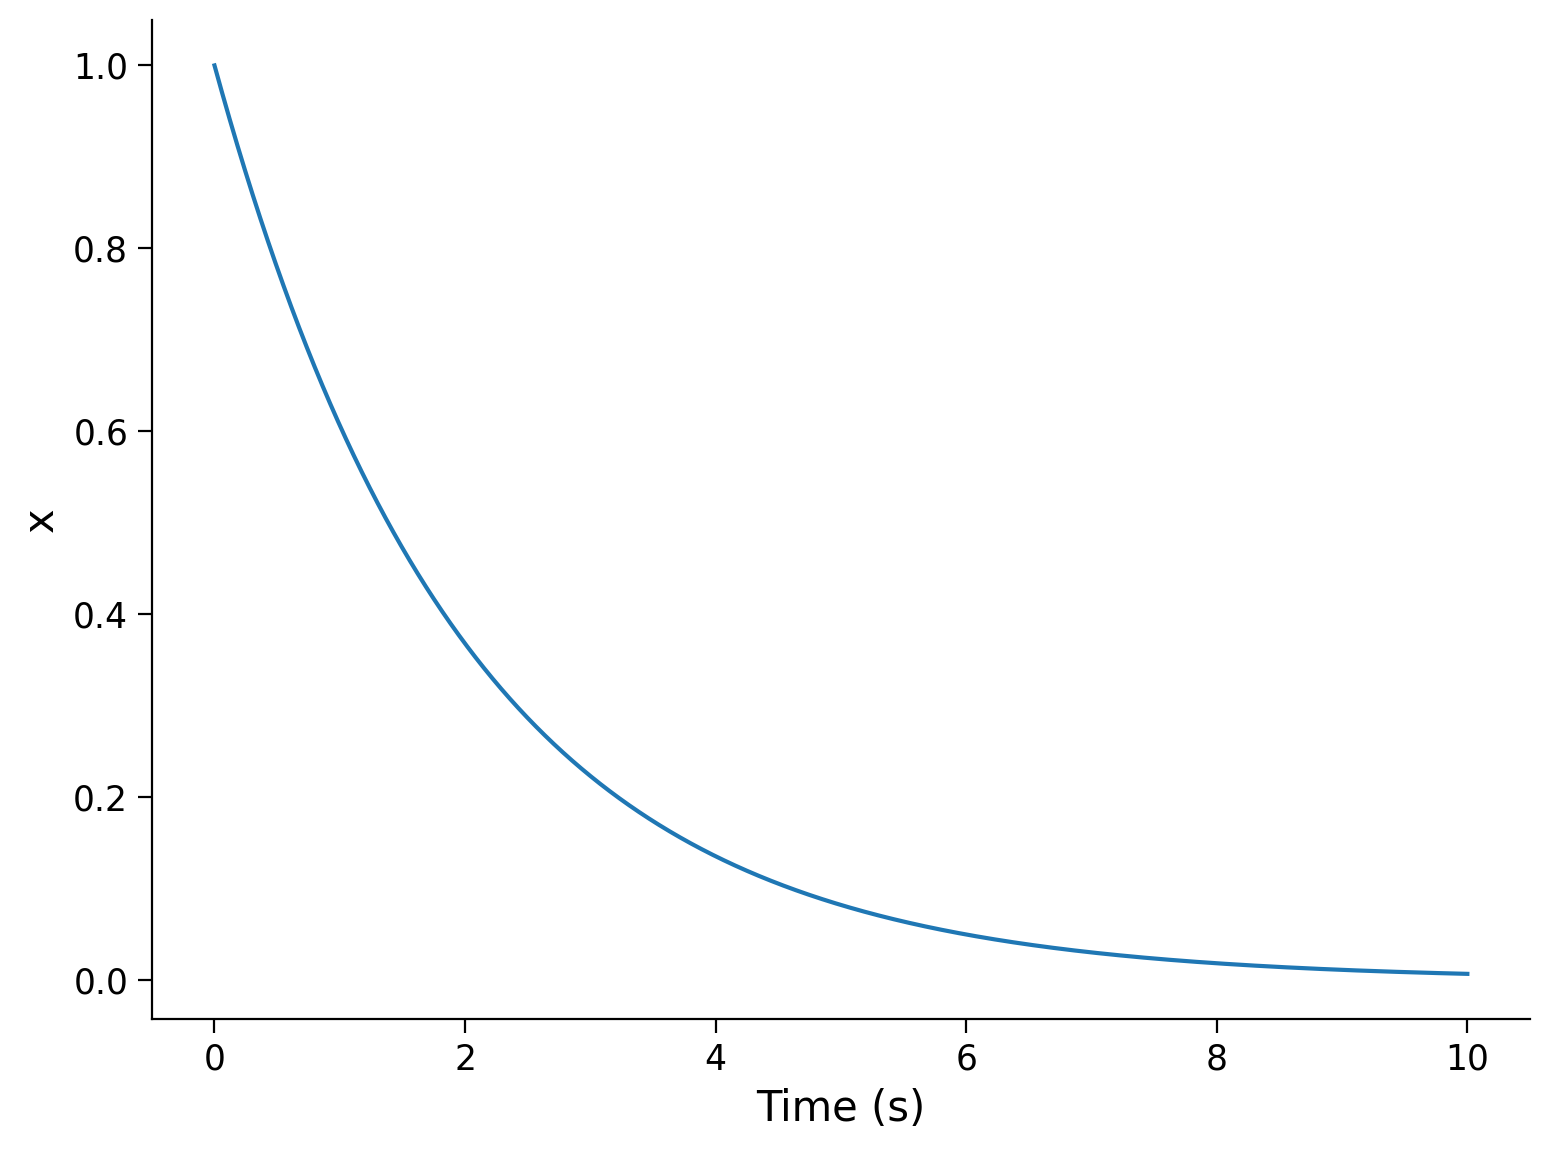

In [4]:
def integrate_exponential(a, x0, dt, T):
  """Compute solution of the differential equation xdot=a*x with
  initial condition x0 for a duration T. Use time step dt for numerical
  solution.

  Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t, dtype=complex)
  x[0] = x0 # This is x at time t_0

  # Step through system and integrate in time
  for k in range(1, len(t)):

    # for each point in time, compute xdot from x[k-1]
    xdot = a * x[k-1]

    # Update x based on x[k-1] and xdot
    x[k] = x[k-1] + xdot * dt

  return x, t


# Choose parameters
a = -0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x0 = 1.     # initial condition of x at time 0

# Use Euler's method
x, t = integrate_exponential(a, x0, dt, T)

# Visualize
plt.plot(t, x.real)
plt.xlabel('Time (s)')
plt.ylabel('x')
plt.show()

interactive(children=(FloatSlider(value=-0.5, description='a', max=1.5, min=-2.5, step=0.25), SelectionSlider(…

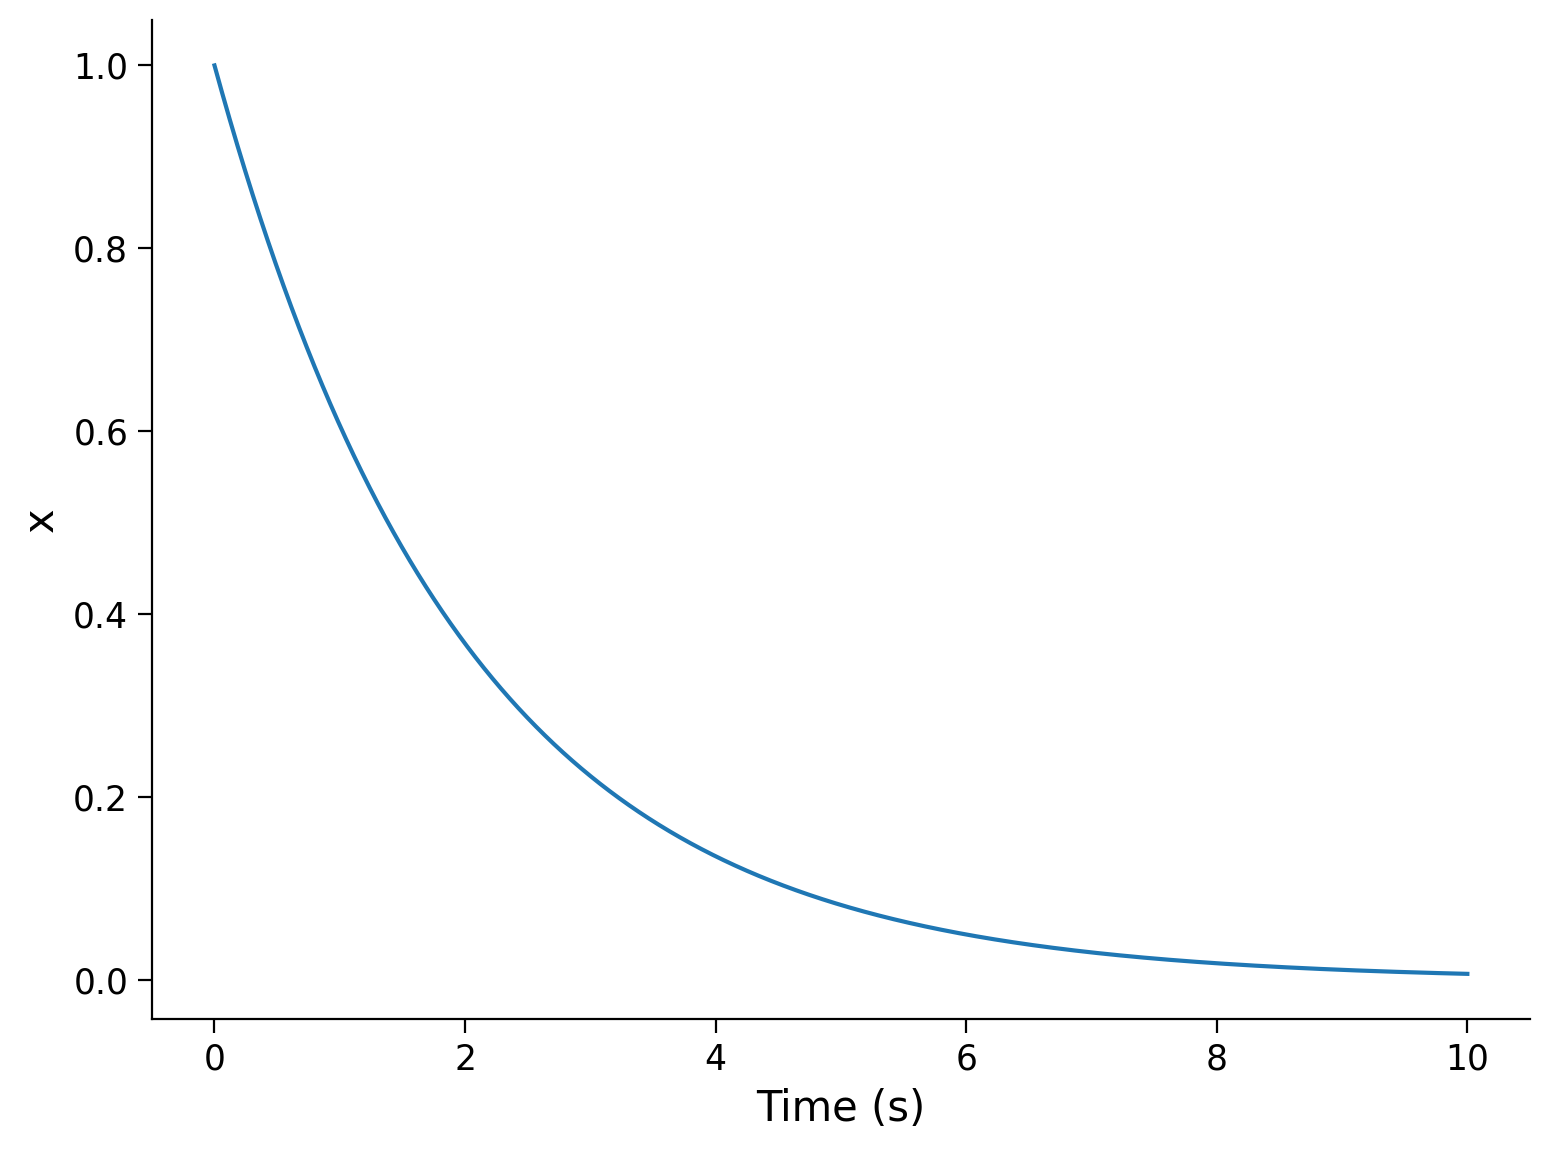

In [7]:
T = 10      # total Time duration
x0 = 1.     # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(a=(-2.5, 1.5, .25), dt = widgets.SelectionSlider(options=[("%g"%i,i) for i in np.arange(0.001, 1.001, 0.01)])):
  # Have to do this clunky word around to show small values in slider accurately
  # (from https://github.com/jupyter-widgets/ipywidgets/issues/259)

  x, t = integrate_exponential(a, x0, dt, T)
  plt.plot(t, x.real) # integrate_exponential returns complex
  plt.xlabel('Time (s)')
  plt.ylabel('x')

1. As the magnitude of a increases, the function x changes more quickly. When a < 0 there is exponentional decay and when a > 0 there is exponential growth. When a = 0 the function is constant.
2. As dt increases, the function becomes less smooth, and if dt is too large, then Euler integration no longer gives an appropriate approximation of the function.

### Section 2: Oscillatory Dynamics

frequency of oscillation scales with imaginary component

In [8]:
# parameters
T = 5  # total Time duration
dt = 0.0001  # timestep of our simulation
x0 = 1.  # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(real=(-2, 2, .2), imaginary=(-4, 7, .1)):

  a = complex(real, imaginary)
  x, t = integrate_exponential(a, x0, dt, T)
  plt.plot(t, x.real)  # integrate exponential returns complex
  plt.grid(True)
  plt.xlabel('Time (s)')
  plt.ylabel('x')
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='real', max=2.0, min=-2.0, step=0.2), FloatSlider(val…

### Section 3: Deterministic Linear Dynamics in Two Dimensions

Adding one additional variable (or _dimension_) adds more variety of behaviors. Additional variables are useful in modeling the dynamics of more complex systems with richer behaviors, such as systems of multiple neurons. We can write such a system using two linear ordinary differential equations:

\begin{eqnarray}
  \dot{x}_1 &=& {a}_{11} x_1 \\
  \dot{x}_2 &=& {a}_{22} x_2 \\
\end{eqnarray}

So far, this system consists of two variables (e.g. neurons) in isolation. To make things interesting, we can add interaction terms:

\begin{eqnarray}
  \dot{x}_1 &=& {a}_{11} x_1 + {a}_{12} x_2 \\
  \dot{x}_2 &=& {a}_{21} x_1 + {a}_{22} x_2 \\
\end{eqnarray}

We can write the two equations that describe our system as one (vector-valued) linear ordinary differential equation:

$$\dot{\mathbf{x}} = \mathbf{A} \mathbf{x}$$

For two-dimensional systems, $\mathbf{x}$ is a vector with 2 elements ($x_1$ and $x_2$) and $\mathbf{A}$ is a $2 \times 2$ matrix with $\mathbf{A}=\bigg[\begin{array} & a_{11} & a_{12} \\ a_{21} & a_{22} \end{array} \bigg]$.

We want to simulate some **trajectories** of a given system and plot how  𝑥1  and  𝑥2  evolve in time. We will begin with this example system:

\begin{equation}
\dot{\mathbf{x}} = \bigg[\begin{array} & 2 & -5 \\ 1 & -2 \end{array} \bigg] \mathbf{x}
\end{equation}

We will use an integrator from scipy, so we won't have to solve the system ourselves. We have a helper function, ``plot_trajectory``, that plots these trajectories given a system function. In this exercise, we will write the system function for a linear system with two variables.

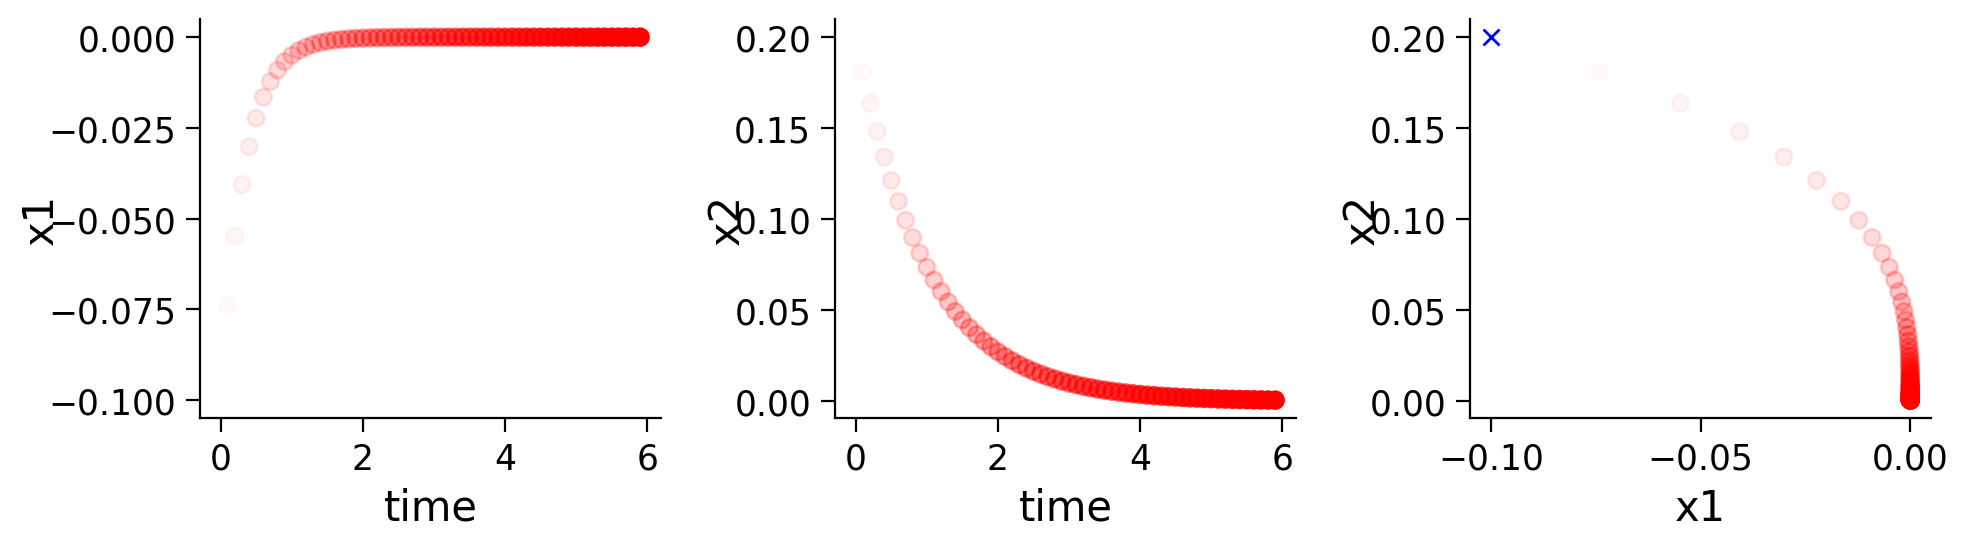

In [9]:
def system(t, x, a00, a01, a10, a11):
  '''
  Compute the derivative of the state x at time t for a linear
  differential equation with A matrix [[a00, a01], [a10, a11]].

  Args:
    t (float): time
    x (ndarray): state variable
    a00, a01, a10, a11 (float): parameters of the system

  Returns:
    ndarray: derivative xdot of state variable x at time t
  '''

  # compute x1dot and x2dot
  x1dot = a00 * x[0] + a01 * x[0]
  x2dot = a10 * x[1] + a11 * x[1]

  return np.array([x1dot, x2dot])


# Set parameters
T = 6 # total time duration
dt = 0.1 # timestep of our simulation
A = np.array([[2, -5],
              [1, -2]])
x0 = [-0.1, 0.2]

# Simulate and plot trajectories
plot_trajectory(system, [A[0, 0], A[0, 1], A[1, 0], A[1, 1]], x0, dt=dt, T=T)

In [10]:
# parameters
T = 6  # total Time duration
dt = 0.1  # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])  # initial condition of x at time 0

A_option_1 = [[2, -5],[1, -2]]
A_option_2 = [[3,4], [1, 2]]
A_option_3 = [[-1, -1], [0, -0.25]]
A_option_4 = [[3, -2],[2, -2]]

@widgets.interact
def plot_euler_integration(A=widgets.Dropdown(options=[A_option_1,
                                                       A_option_2,
                                                       A_option_3,
                                                       A_option_4,
                                                       None],
                                              value=A_option_1)):
  if A:
    plot_trajectory(system, [A[0][0],A[0][1],A[1][0],A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='A', options=([[2, -5], [1, -2]], [[3, 4], [1, 2]], [[-1, -1], [0, …

In [11]:
# parameters
T = 6  # total Time duration
dt = 0.1  # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])  # initial condition of x at time 0
A = [[2, -5],[1, -2]]

x0_option_1 = [-.1, 0.2]
x0_option_2 = [10, 10]
x0_option_3 = [-4, 3]

@widgets.interact
def plot_euler_integration(x0 = widgets.Dropdown(options=[x0_option_1,
                                                          x0_option_2,
                                                          x0_option_3,
                                                          None],
                                                 value=x0_option_1)):
  if x0:
    plot_trajectory(system, [A[0][0], A[0][1], A[1][0], A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='x0', options=([-0.1, 0.2], [10, 10], [-4, 3], None), value=[-0.1, …

### Section 4: Stream Plots

We can think of a initial condition ${\bf x}_0=(x_{1_0},x_{2_0})$  as coordinates for a position in a space. For a 2x2 matrix $\bf A$, a stream plot computes at each position $\bf x$ a small arrow that indicates $\bf Ax$ and then connects the small arrows to form _stream lines_. Remember from the beginning of this tutorial that $\dot {\bf x} = \bf Ax$ is the rate of change of $\bf x$. So the stream lines indicate how a system changes. If you are interested in a particular initial condition ${\bf x}_0$, just find the corresponding position in the stream plot. The stream line that goes through that point in the stream plot indicates ${\bf x}(t)$.

Using some helper functions, we show the stream plots for each option of A that you examined in the earlier interactive demo. We included the eigenvectors of $\bf A$ as a red line (1st eigenvalue) and a blue line (2nd eigenvalue) in the stream plots.

What is special about the direction in which the principal eigenvector points? And how does the stability of the system relate to the corresponding eigenvalues? (Hint: Remember from your [introduction to linear algebra](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s) that, for matrices with real eigenvalues, the eigenvectors indicate the lines on which $\bf Ax$ is parallel to $\bf x$ and real eigenvalues indicate the factor by which $\bf Ax$ is stretched or shrunk compared to $\bf x$.)

In [12]:
A_option_1 = np.array([[2, -5], [1, -2]])
A_option_2 = np.array([[3,4], [1, 2]])
A_option_3 = np.array([[-1, -1], [0, -0.25]])
A_option_4 = np.array([[3, -2], [2, -2]])

A_options = [A_option_1, A_option_2, A_option_3, A_option_4]
plot_specific_example_stream_plots(A_options)

Output hidden; open in https://colab.research.google.com to view.

## Tutorial 2: Markov Processes

For some probabilistic dynamical systems, the differential equations express a relationship between $\dot{x}$ and $x$ at every time $t$, so that the direction of $x$ at _every_ time depends entirely on the value of $x$. Said a different way, knowledge of the value of the state variables $x$ at time t is _all_ the information needed to determine $\dot{x}$ and therefore $x$ at the next time.

This property --- that the present state entirely determines the transition to the next state --- is what defines a **Markov process** and systems obeying this property can be described as **Markovian**.

The goal of Tutorial 2 is to consider this type of Markov process in a simple example where the state transitions are probabilistic.

In [14]:
# @title Plotting Functions

def plot_switch_simulation(t, x):
  plt.figure()
  plt.plot(t, x)
  plt.title('State-switch simulation')
  plt.xlabel('Time')
  plt.xlim((0, 300)) # zoom in time
  plt.ylabel('State of ion channel 0/1', labelpad=-60)
  plt.yticks([0, 1], ['Closed (0)', 'Open (1)'])
  plt.show()


def plot_interswitch_interval_histogram(inter_switch_intervals):
  plt.figure()
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()


def plot_state_probabilities(time, states):
  plt.figure()
  plt.plot(time, states[:, 0], label='Closed to open')
  plt.plot(time, states[:, 1], label='Open to closed')
  plt.xlabel('time')
  plt.ylabel('prob(open OR closed)')
  plt.legend()
  plt.show()

### Section 1: Telegraph Process

This video covers a definition of Markov processes and an introduction to ion channels opening/closing as an example of a telegraph process.

Let's consider a Markov process with two states, where switches between each two states are probabilistic (known as a telegraph process). To be concrete, let's say we are modeling an **ion channel in a neuron that can be in one of two states: Closed (0) or Open (1)**.

If the ion channel is Closed, it may transition to the Open state with probability $P(0 \rightarrow 1 | x = 0) = \mu_{c2o}$. Likewise, If the ion channel is Open, it transitions to Closed with probability $P(1 \rightarrow 0 | x=1) = \mu_{o2c}$.

We simulate the process of changing states as a **Poisson process**. You have seen the Poisson process in the [pre-reqs statistics day](https://compneuro.neuromatch.io/tutorials/W0D5_Statistics/student/W0D5_Tutorial1.html). The Poisson process is a way to model discrete events where the average time between event occurrences is known but the exact time of some event is not known. Importantly, the Poisson process dictates the following points:
1. The probability of some event occurring is _independent from all other events_.
2. The average rate of events within a given time period is constant.
3. Two events cannot occur at the same moment. Our ion channel can either be in an open or closed state, but not both simultaneously.

In the simulation below, we will use the Poisson process to model the state of our ion channel at all points $t$ within the total simulation time $T$.

As we simulate the state change process, we also track at which times throughout the simulation the state makes a switch. We can use those times to measure the distribution of the time _intervals_ between state switches.

You briefly saw a Markov process in the [pre-reqs statistics day](https://compneuro.neuromatch.io/tutorials/W0D5_Statistics/student/W0D5_Tutorial2.html#section-1-2-markov-chains).

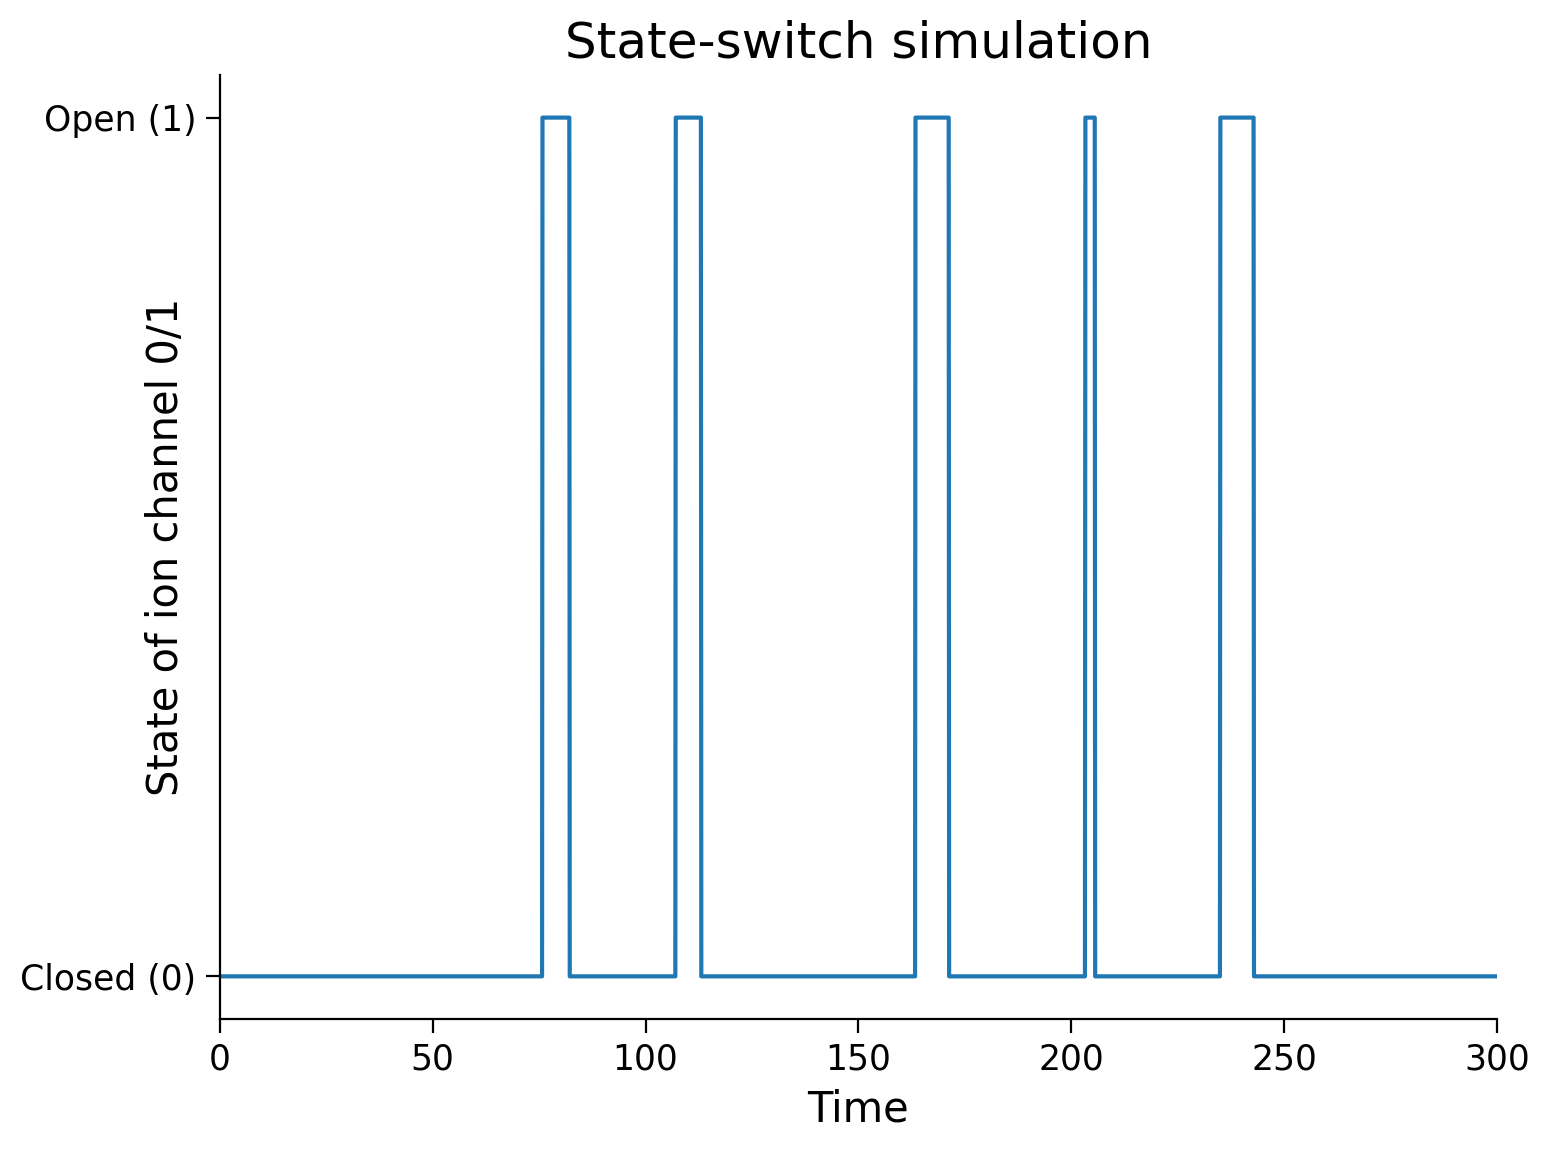

In [15]:
# parameters
T = 5000     # total Time duration
dt = 0.001   # timestep of our simulation

# simulate state of our ion channel in time
# the two parameters that govern transitions are
# c2o: closed to open rate
# o2c: open to closed rate
def ion_channel_opening(c2o, o2c, T, dt):
  # initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t)
  switch_times = []

  # assume we always start in Closed state
  x[0] = 0

  # generate a bunch of random uniformly distributed numbers
  # between zero and unity: [0, 1),
  # one for each dt in our simulation.
  # we will use these random numbers to model the
  # closed/open transitions
  myrand = np.random.random_sample(size=len(t))


  # walk through time steps of the simulation
  for k in range(len(t)-1):
    # switching between closed/open states are
    # Poisson processes
    if x[k] == 0 and myrand[k] < c2o*dt: # remember to scale by dt!
      x[k+1:] = 1
      switch_times.append(k*dt)
    elif x[k] == 1 and myrand[k] < o2c*dt:
      x[k+1:] = 0
      switch_times.append(k*dt)

  return t, x, switch_times


c2o = 0.02
o2c = 0.1
np.random.seed(0) # set random seed
t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)
plot_switch_simulation(t, x)

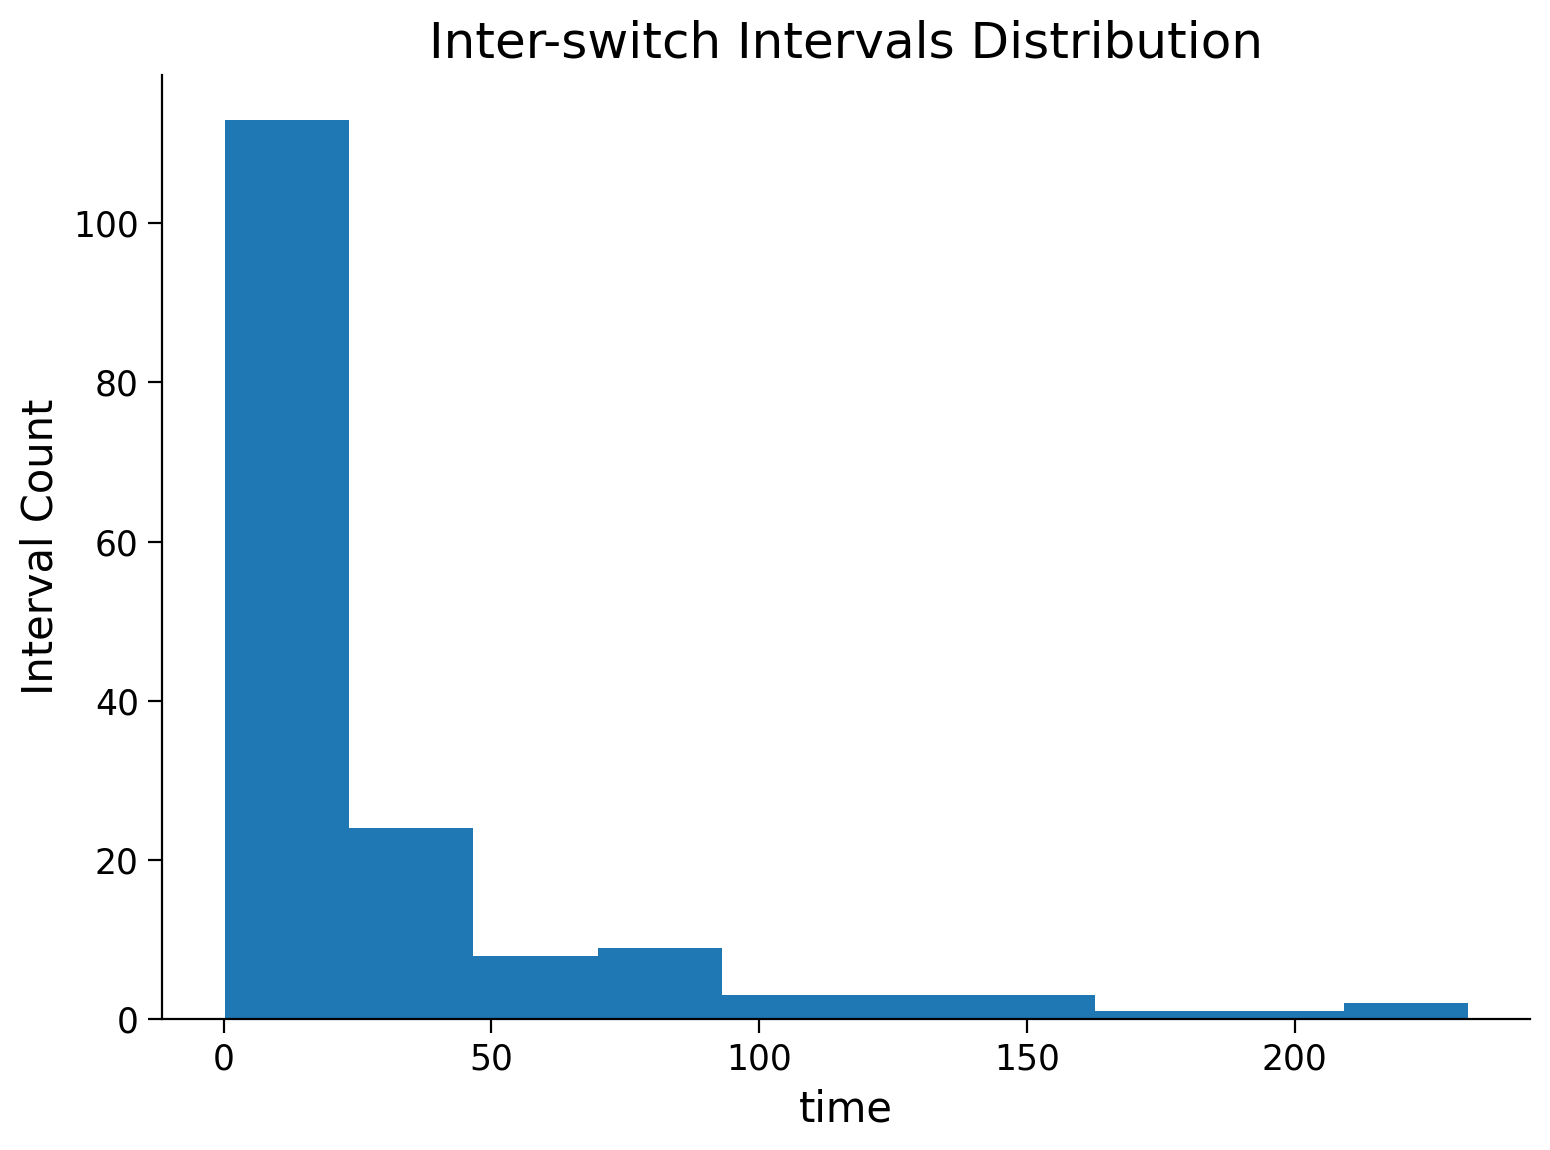

In [16]:
# hint: see np.diff()
inter_switch_intervals = np.diff(switch_times)

# plot inter-switch intervals
plot_interswitch_interval_histogram(inter_switch_intervals)

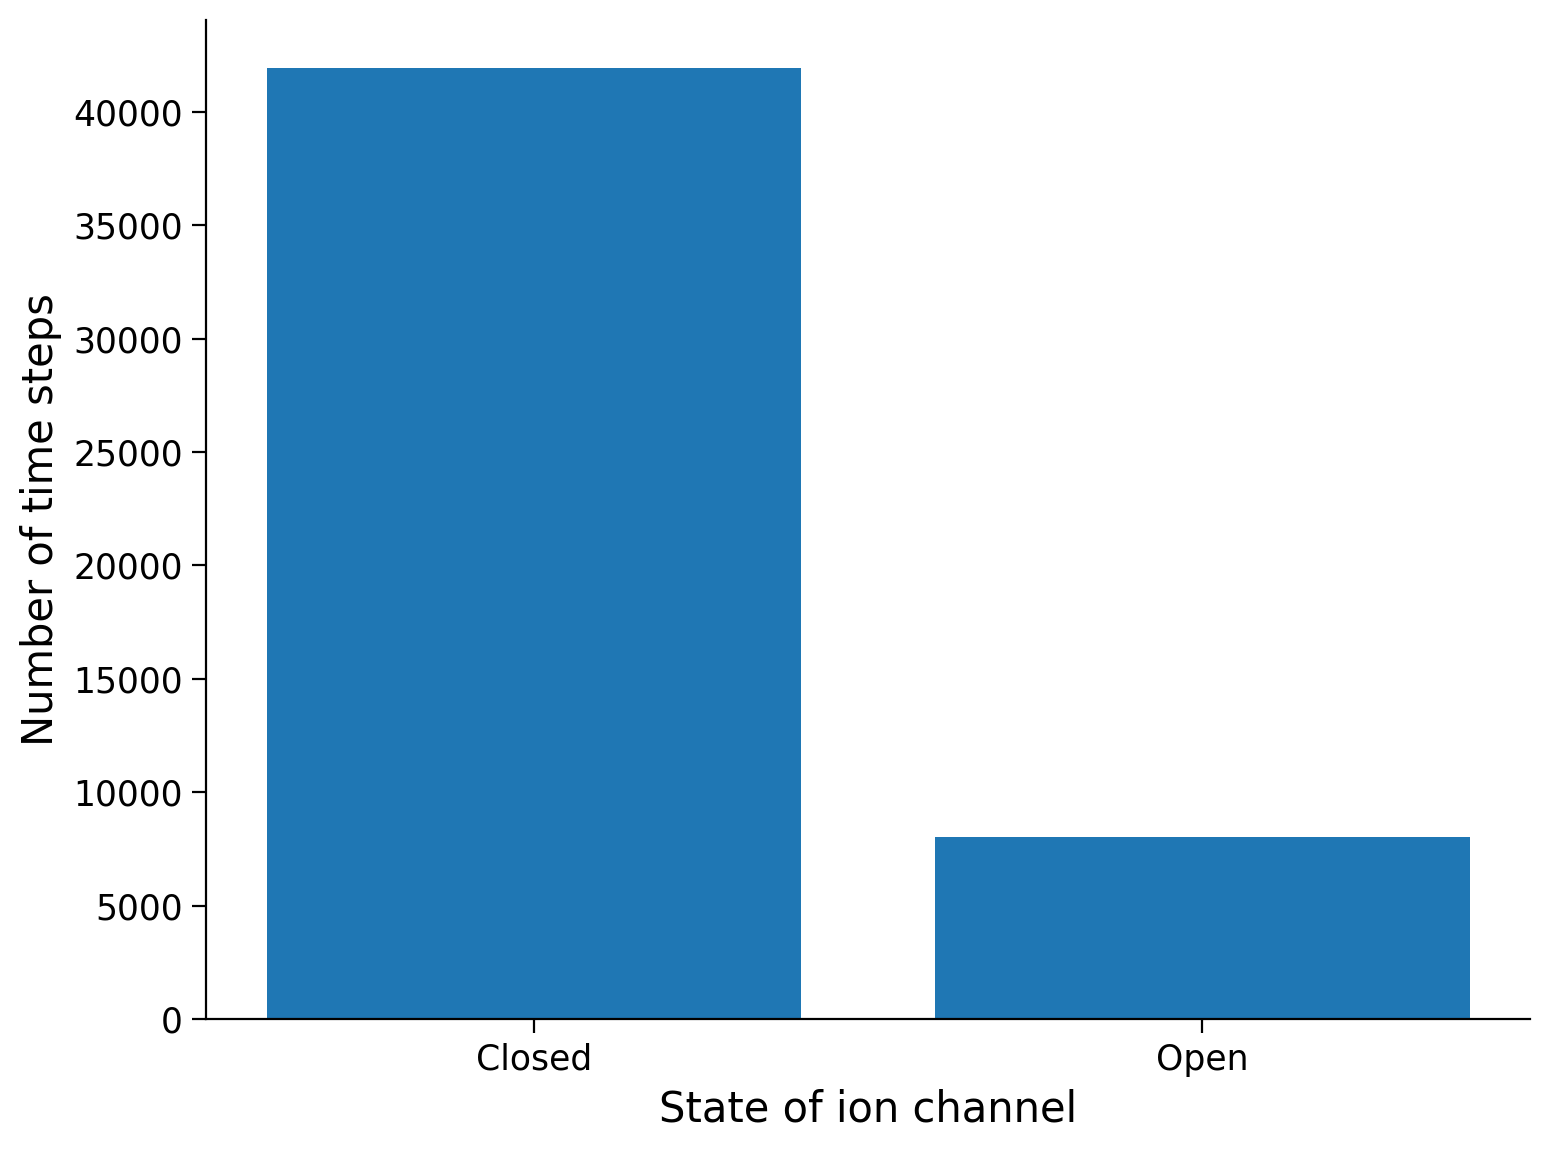

In [17]:
states = ['Closed', 'Open']
(unique, counts) = np.unique(x, return_counts=True)

plt.figure()
plt.bar(states, counts)
plt.ylabel('Number of time steps')
plt.xlabel('State of ion channel')
plt.show()

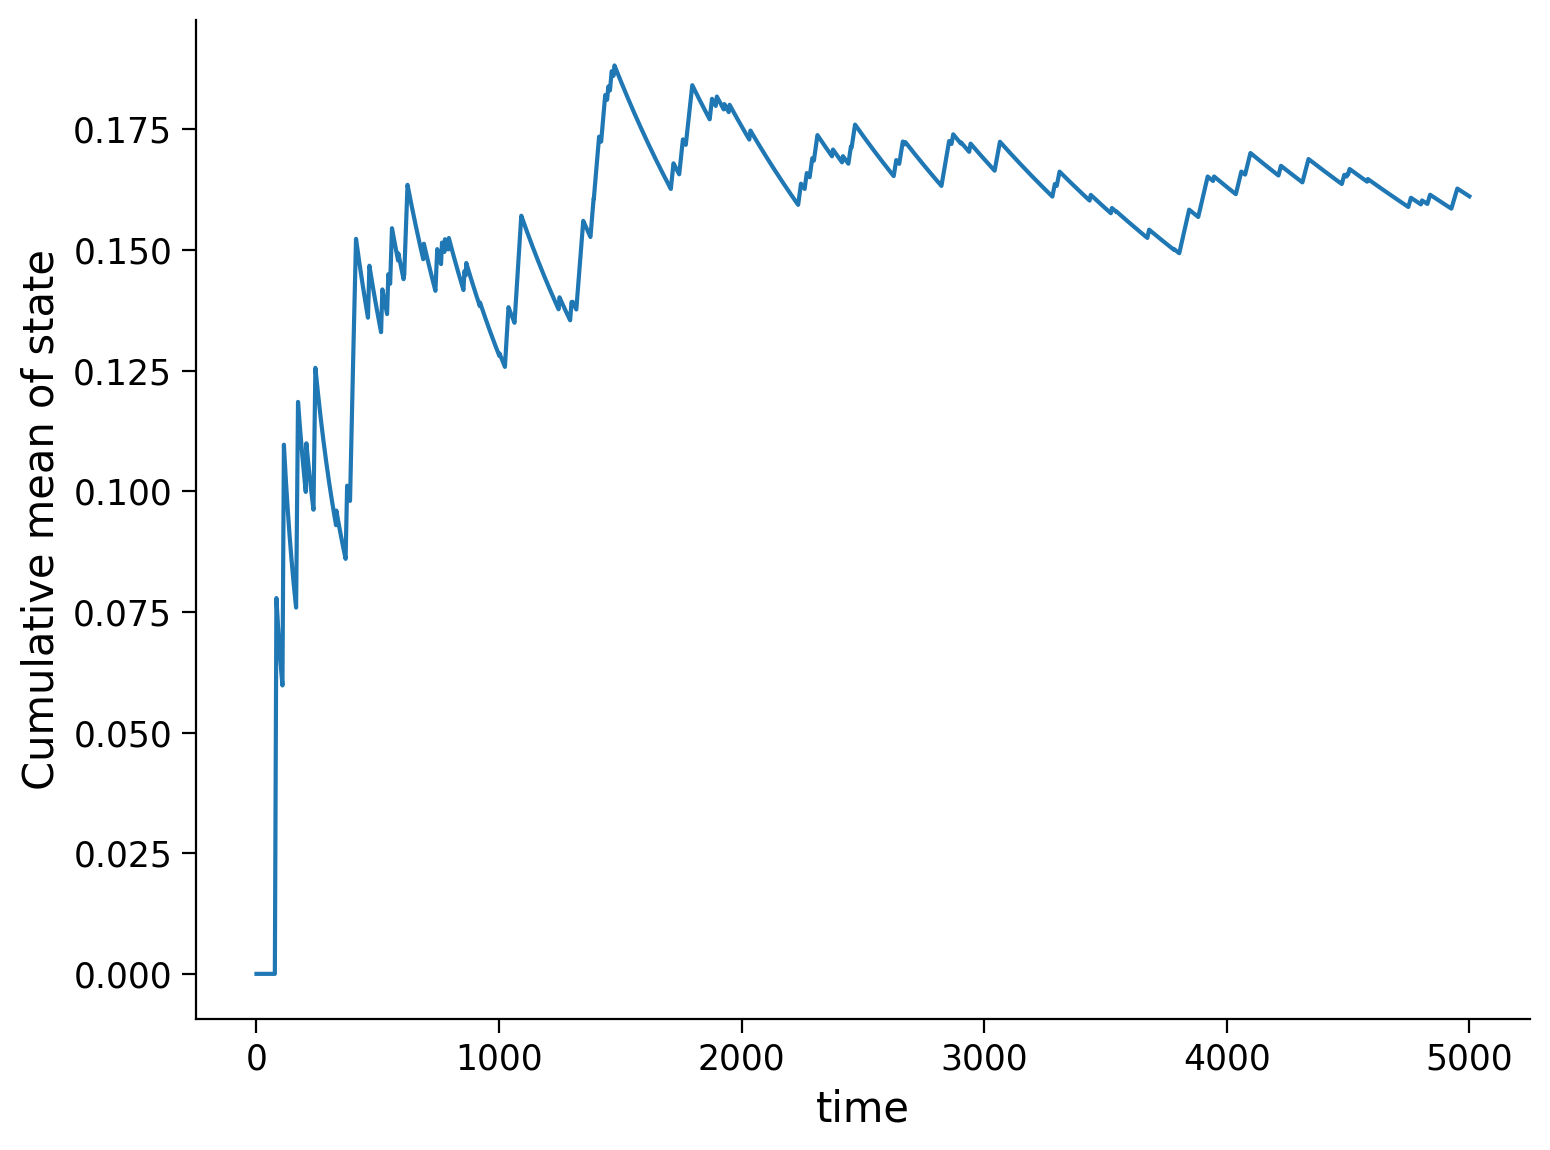

In [18]:
plt.figure()
plt.plot(t, np.cumsum(x) / np.arange(1, len(t)+1))
plt.xlabel('time')
plt.ylabel('Cumulative mean of state')
plt.show()

### Section 3: Equilibrium of the telegraph process

In [19]:
# compute the eigendecomposition of A
lam, v = np.linalg.eig(A)

# print the 2 eigenvalues
print(f"Eigenvalues: {lam}")

# print the 2 eigenvectors
eigenvector1 = v[:, 0]
eigenvector2 = v[:, 1]
print(f"Eigenvector 1: {eigenvector1}")
print(f"Eigenvector 2: {eigenvector2}")

Eigenvalues: [-6.9388939e-17+1.j -6.9388939e-17-1.j]
Eigenvector 1: [0.91287093+0.j         0.36514837-0.18257419j]
Eigenvector 2: [0.91287093-0.j         0.36514837+0.18257419j]


In [20]:
print(eigenvector1 / eigenvector1.sum())
print(eigenvector2 / eigenvector2.sum())

[0.7+0.1j 0.3-0.1j]
[0.7-0.1j 0.3+0.1j]


## Tutorial 3: Combining Determinism and Stochasticity

In [21]:
# @title Plotting Functions

def plot_random_walk_sims(sims, nsims=10):
  """Helper for exercise 3A"""
  plt.figure()
  plt.plot(sim[:nsims, :].T)
  plt.xlabel('time')
  plt.ylabel('position x')
  plt.show()


def plot_mean_var_by_timestep(mu, var):
  """Helper function for exercise 3A.2"""
  fig, (ah1, ah2) = plt.subplots(2)

  # plot mean of distribution as a function of time
  ah1.plot(mu)
  ah1.set(ylabel='mean')
  ah1.set_ylim([-5, 5])

  # plot variance of distribution as a function of time
  ah2.plot(var)
  ah2.set(xlabel='time')
  ah2.set(ylabel='variance')

  plt.show()


def plot_ddm(t, x, xinfty, lam, x0):
  plt.figure()
  plt.plot(t, xinfty * (1 - lam**t) + x0 * lam**t, 'r',
           label='deterministic solution')
  plt.plot(t, x, 'k.', label='simulation')  # simulated data pts
  plt.xlabel('t')
  plt.ylabel('x')
  plt.legend()
  plt.show()


def var_comparison_plot(empirical, analytical):
  plt.figure()
  plt.plot(empirical, analytical, '.', markersize=15)
  plt.xlabel('empirical equilibrium variance')
  plt.ylabel('analytic equilibrium variance')
  plt.plot(np.arange(8), np.arange(8), 'k', label='45 deg line')
  plt.legend()
  plt.grid(True)
  plt.show()


def plot_dynamics(x, t, lam, xinfty=0):
  """ Plot the dynamics """
  plt.figure()
  plt.title('$\lambda=%0.1f$' % lam, fontsize=16)
  x0 = x[0]
  plt.plot(t, xinfty + (x0 - xinfty) * lam**t, 'r', label='analytic solution')
  plt.plot(t, x, 'k.', label='simulation')  # simulated data pts
  plt.ylim(0, x0+1)
  plt.xlabel('t')
  plt.ylabel('x')
  plt.legend()
  plt.show()

### Section 1: Random Walks

Here, we will consider what the _E. coli_ does in the absence of food odors. What's the best strategy when one does not know where to head? Why, flail around randomly, of course!

The **random walk** is exactly that --- at every time step, use a random process like flipping a coin to change one's heading accordingly. Note that this process is closely related to _Brownian motion_, so you may sometimes hear that terminology used as well.

Let's start with a **one-dimensional random walk**. A bacterium starts at $x=0$. At every time step, it flips a coin (a very small, microscopic coin of protein mintage), then heads left $\Delta x = -1$ or right $\Delta x = +1$ for with equal probability. For instance, if at time step $1$ the result of the coin flip is to head right, then its position at that time step becomes $x_1 = x_0 + \Delta x = 1.$ Continuing in this way, its position at time step $k+1$ is given by

\begin{equation}
x_{k+1} = x_k + \Delta x
\end{equation}

We will simulate this process below and plot the position of the bacterium as a function of the time step.

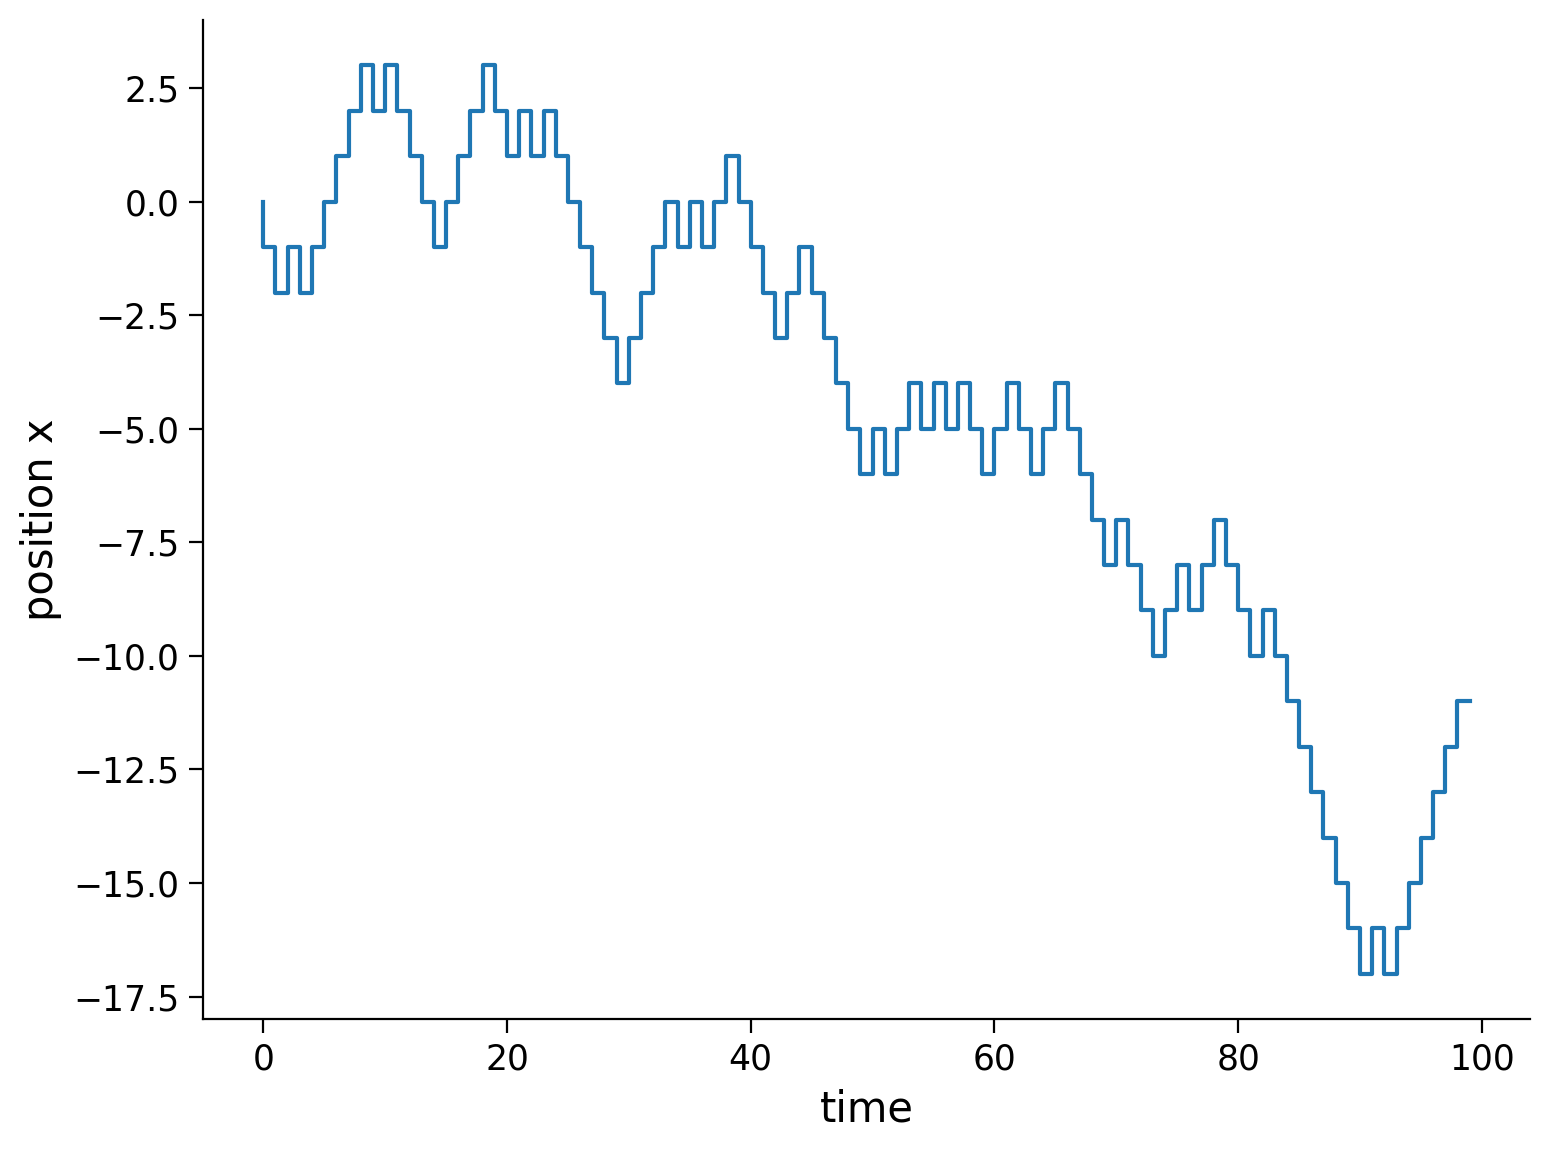

In [22]:
# parameters of simulation
T = 100
t = np.arange(T)
x = np.zeros_like(t)
np.random.seed(2020) # set random seed

# initial position
x[0] = 0

# step forward in time
for k in range(len(t)-1):
    # choose randomly between -1 and 1 (coin flip)
    this_step = np.random.choice([-1,1])

    # make the step
    x[k+1] = x[k] + this_step

# plot this trajectory
plt.figure()
plt.step(t, x)
plt.xlabel('time')
plt.ylabel('position x')
plt.show()

In [24]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

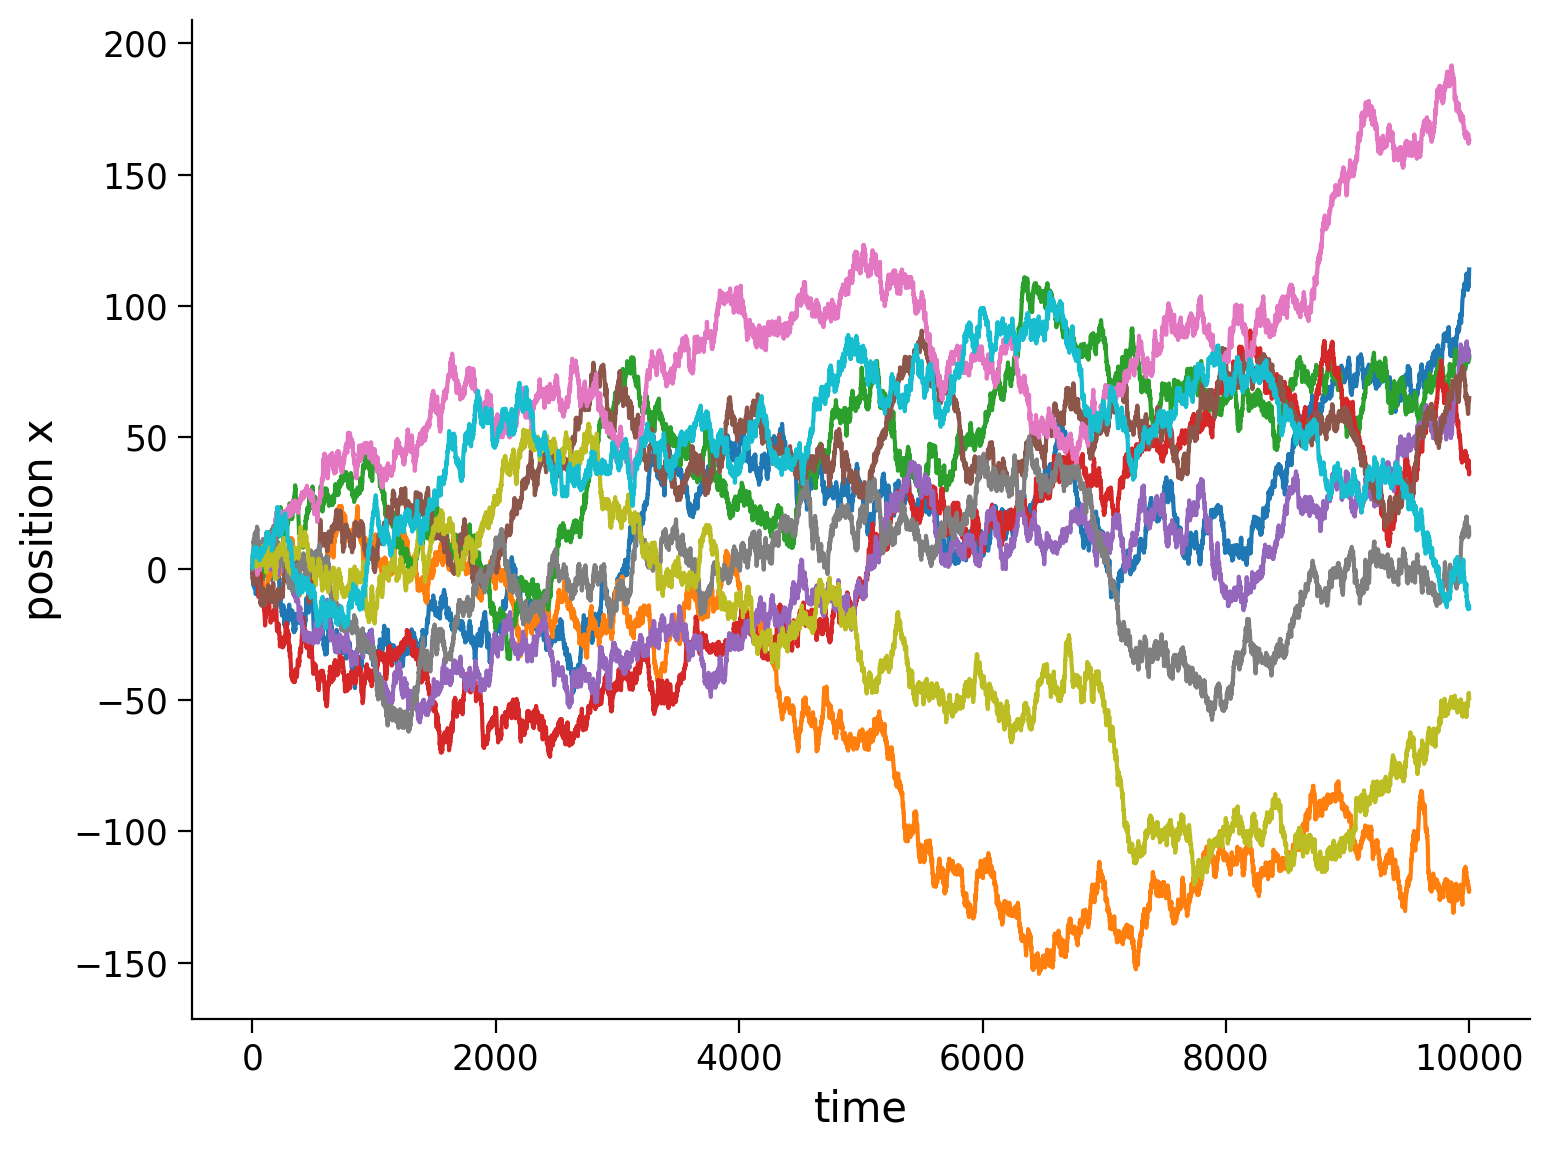

In [25]:
def random_walk_simulator(N, T, mu=0, sigma=1):
  '''Simulate N random walks for T time points. At each time point, the step
      is drawn from a Gaussian distribution with mean mu and standard deviation
      sigma.

  Args:
    T (integer) : Duration of simulation in time steps
    N (integer) : Number of random walks
    mu (float) : mean of step distribution
    sigma (float) : standard deviation of step distribution

  Returns:
    (numpy array) : NxT array in which each row corresponds to trajectory
  '''


  # generate all the random steps for all steps in all simulations in one go
  # produces a N x T array
  steps = np.random.normal(mu, sigma, size=(N, T))

  # compute the cumulative sum of all the steps over the time axis
  sim = np.cumsum(steps, axis=1)

  return sim


np.random.seed(2020) # set random seed

# simulate 1000 random walks for 10000 time steps
sim = random_walk_simulator(1000, 10000,  mu=0, sigma=1)

# take a peek at the first 10 simulations
plot_random_walk_sims(sim, nsims=10)

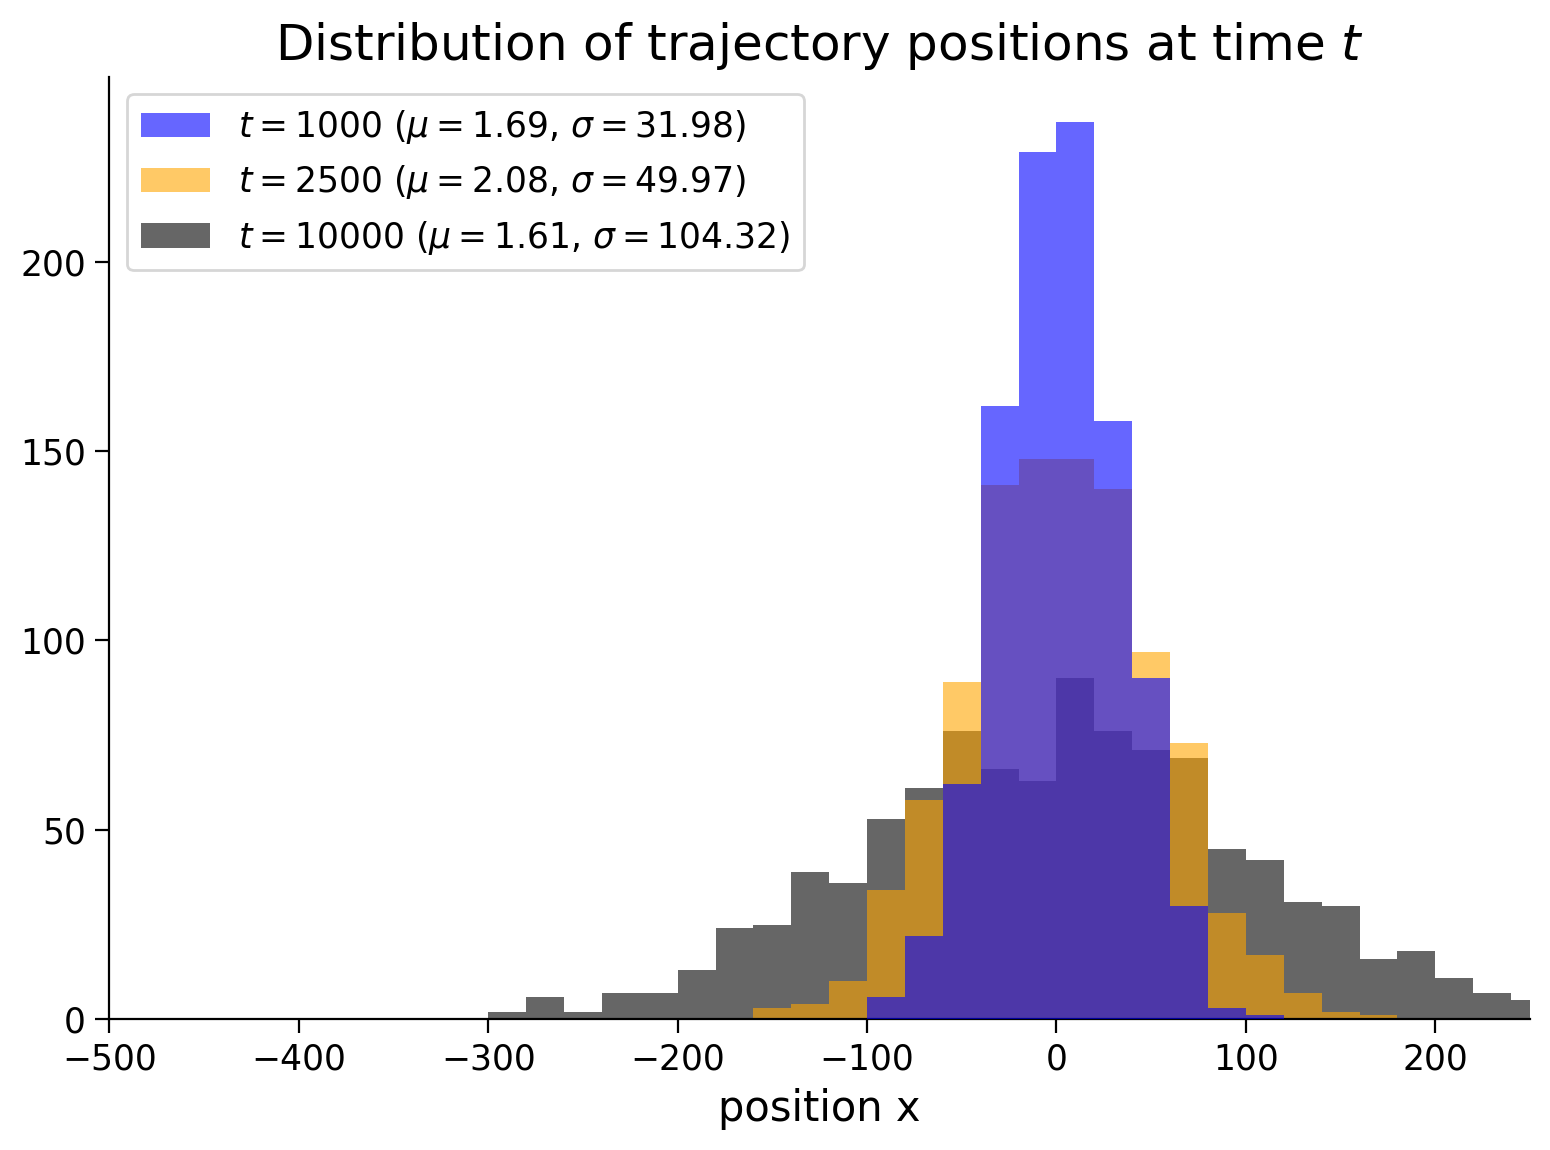

In [27]:
# visualize distribution of bacteria positions
fig = plt.figure()
# look at the distribution of positions at different times
for i, t in enumerate([1000, 2500, 10000]):

  # get mean and standard deviation of distribution at time t
  mu = sim[:, t-1].mean()
  sig2 = sim[:, t-1].std()

  # make a plot label
  mytitle = '$t=${time:d} ($\mu=${mu:.2f}, $\sigma=${var:.2f})'

  # plot histogram
  plt.hist(sim[:,t-1],
           color=['blue','orange','black'][i],
           # make sure the histograms have the same bins!
           bins=np.arange(-300, 300, 20),
           # make histograms a little see-through
           alpha=0.6,
           # draw second histogram behind the first one
           zorder=3-i,
           label=mytitle.format(time=t, mu=mu, var=sig2))

  plt.xlabel('position x')

  # plot range
  plt.xlim([-500, 250])

  # add legend
  plt.legend(loc=2)

# add title
plt.title(r'Distribution of trajectory positions at time $t$')
plt.show()

At the beginning of the simulation, the distribution of positions is sharply peaked about $0$. As time progresses, the distribution becomes wider but its center stays closer to $0$. In other words, the mean of the distribution is independent of time, but the variance and standard deviation of the distribution scale with time. Such a process is called a **diffusive process**.

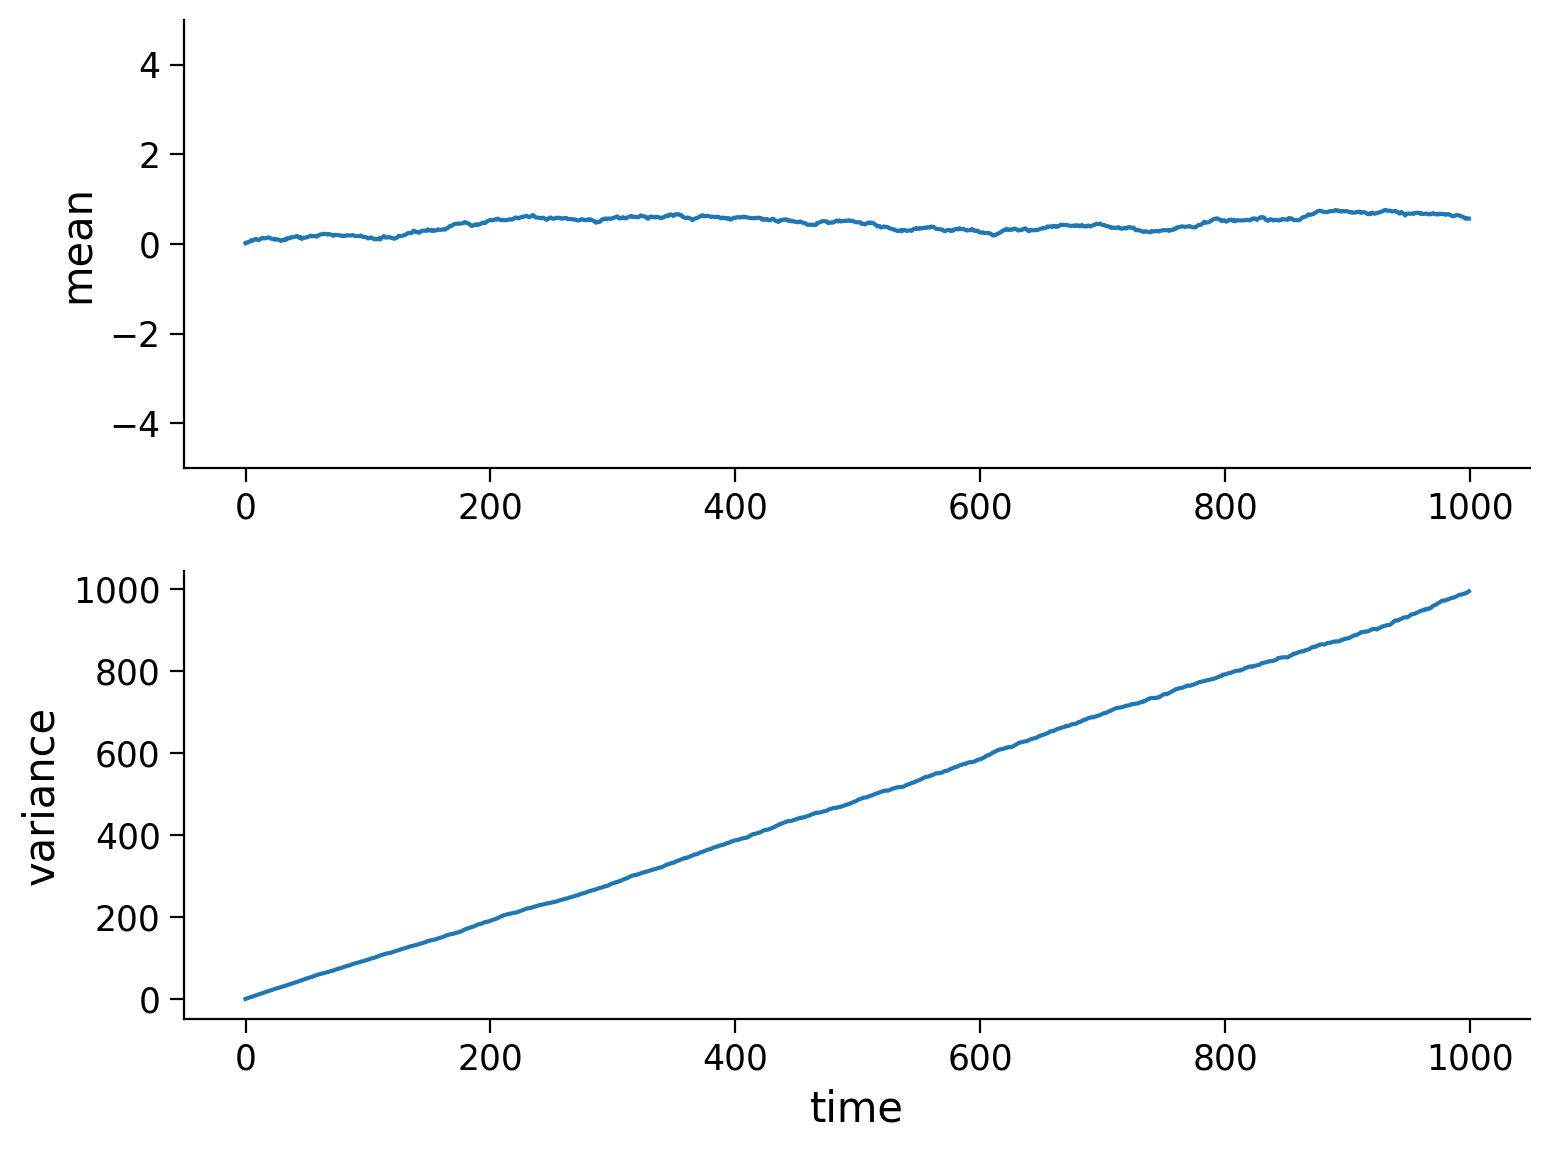

In [32]:
# Simulate random walks
np.random.seed(2020) # set random seed
sim = random_walk_simulator(5000, 1000, mu=0, sigma=1)

# Compute mean
mu = np.mean(sim, axis=0) # sim is N x T so mean across different trajectories, one value per timepoint

# Compute variance
var = np.var(sim, axis=0)

# Visualize
plot_mean_var_by_timestep(mu, var)

In [33]:
@widgets.interact
def plot_gaussian(mean=(-0.5, 0.5, .02), std=(.5, 10, .5)):
  sim = random_walk_simulator(5000, 1000, mu=mean, sigma=std)
  # compute the mean and variance of trajectory positions at every time point
  mu = np.mean(sim, axis=0)
  var = np.var(sim, axis=0)
  # make a figure
  fig, (ah1, ah2) = plt.subplots(2)
  # plot mean of distribution as a function of time
  ah1.plot(mu)
  ah1.set(ylabel='mean')
  # plot variance of distribution as a function of time
  ah2.plot(var)
  ah2.set(xlabel='time')
  ah2.set(ylabel='variance')
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='mean', max=0.5, min=-0.5, step=0.02), FloatSlider(va…

### Section 2: The Ornstein-Uhlenbeck (OU) process

The random walk process we just explored is diffusive, and the distribution of possible trajectories _spreads_, taking on increasing variance with time. Even so, at least in one dimension, the mean remains close to the initial value (in the example above, 0).

Our goal is now to build on this model to construct a **drift-diffusion** model (DDM). DDM is a popular model for memory, which as we all know, is often an exercise in hanging on to a value imperfectly. Decision-making and memory will be the topic for tomorrow, so here we build the mathematical foundations and develop some intuition for how such systems behave!

To build such a model, let's combine the random walk model with the first differential equations we explored in Tutorial 1 earlier. Although those models had been written in continuous time as $\dot{x} = a x$, here let's consider the discrete version of the same system and write:

$x_{k+1} = \lambda x_k$,

whose solution can be written as

$x_k = x_0 \lambda^k$,

where $x_0$ is the value of $x$ at time $t=0$.

Now, let's simulate and plot the solution of the discrete version of our first differential equation from Tutorial 1 below. **Run the code below.**

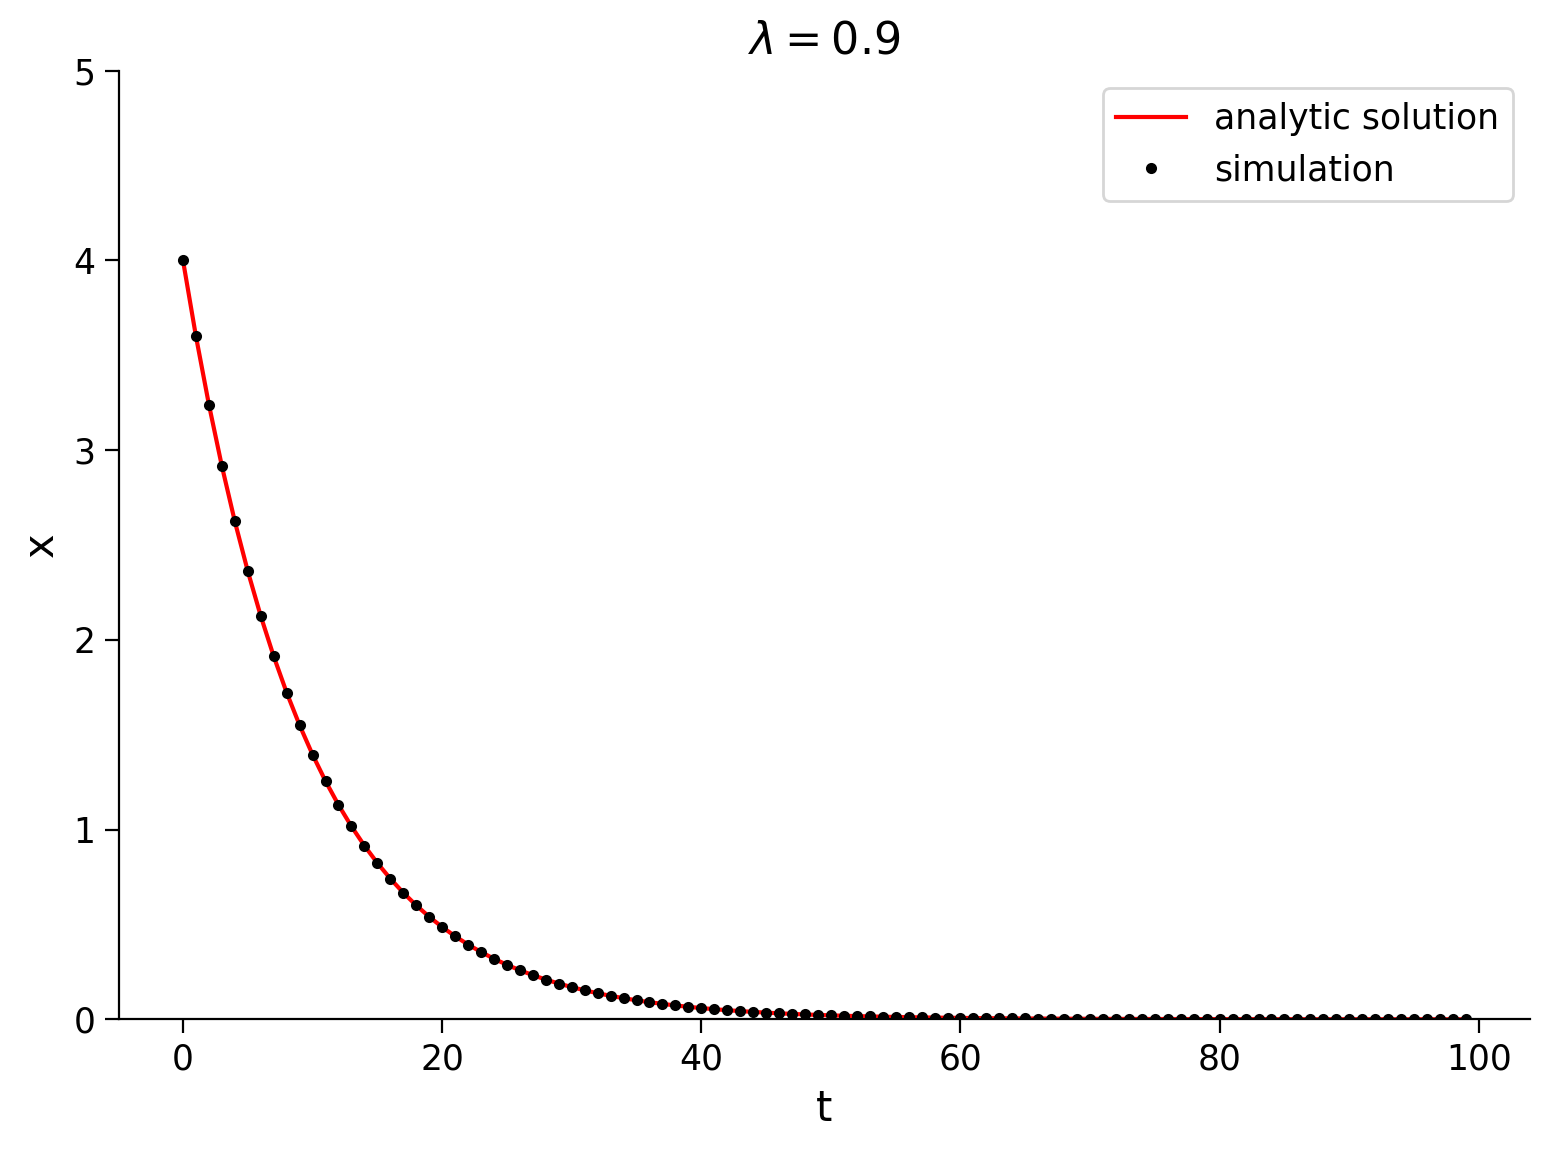

In [35]:
# parameters
lam = 0.9
T = 100  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
  x[k+1] = lam * x[k]

# plot x as it evolves in time
plot_dynamics(x, t, lam)

Notice that this process decays towards position $x=0$. We can make it decay towards any position by adding another parameter $x_\infty$. The rate of decay is proportional to the difference between $x$ and $x_\infty$. Our new system is

\begin{equation}
x_{k+1} = x_\infty + \lambda(x_k - x_{\infty})
\end{equation}

We have to modify our analytic solution slightly to take this into account:

\begin{equation}
x_k = x_\infty(1 - \lambda^k) + x_0 \lambda^k.
\end{equation}

Let's simulate and plot the dynamics of this process below. Hopefully, we see that it start at $x_0$ and decay towards $x_{\infty}.$

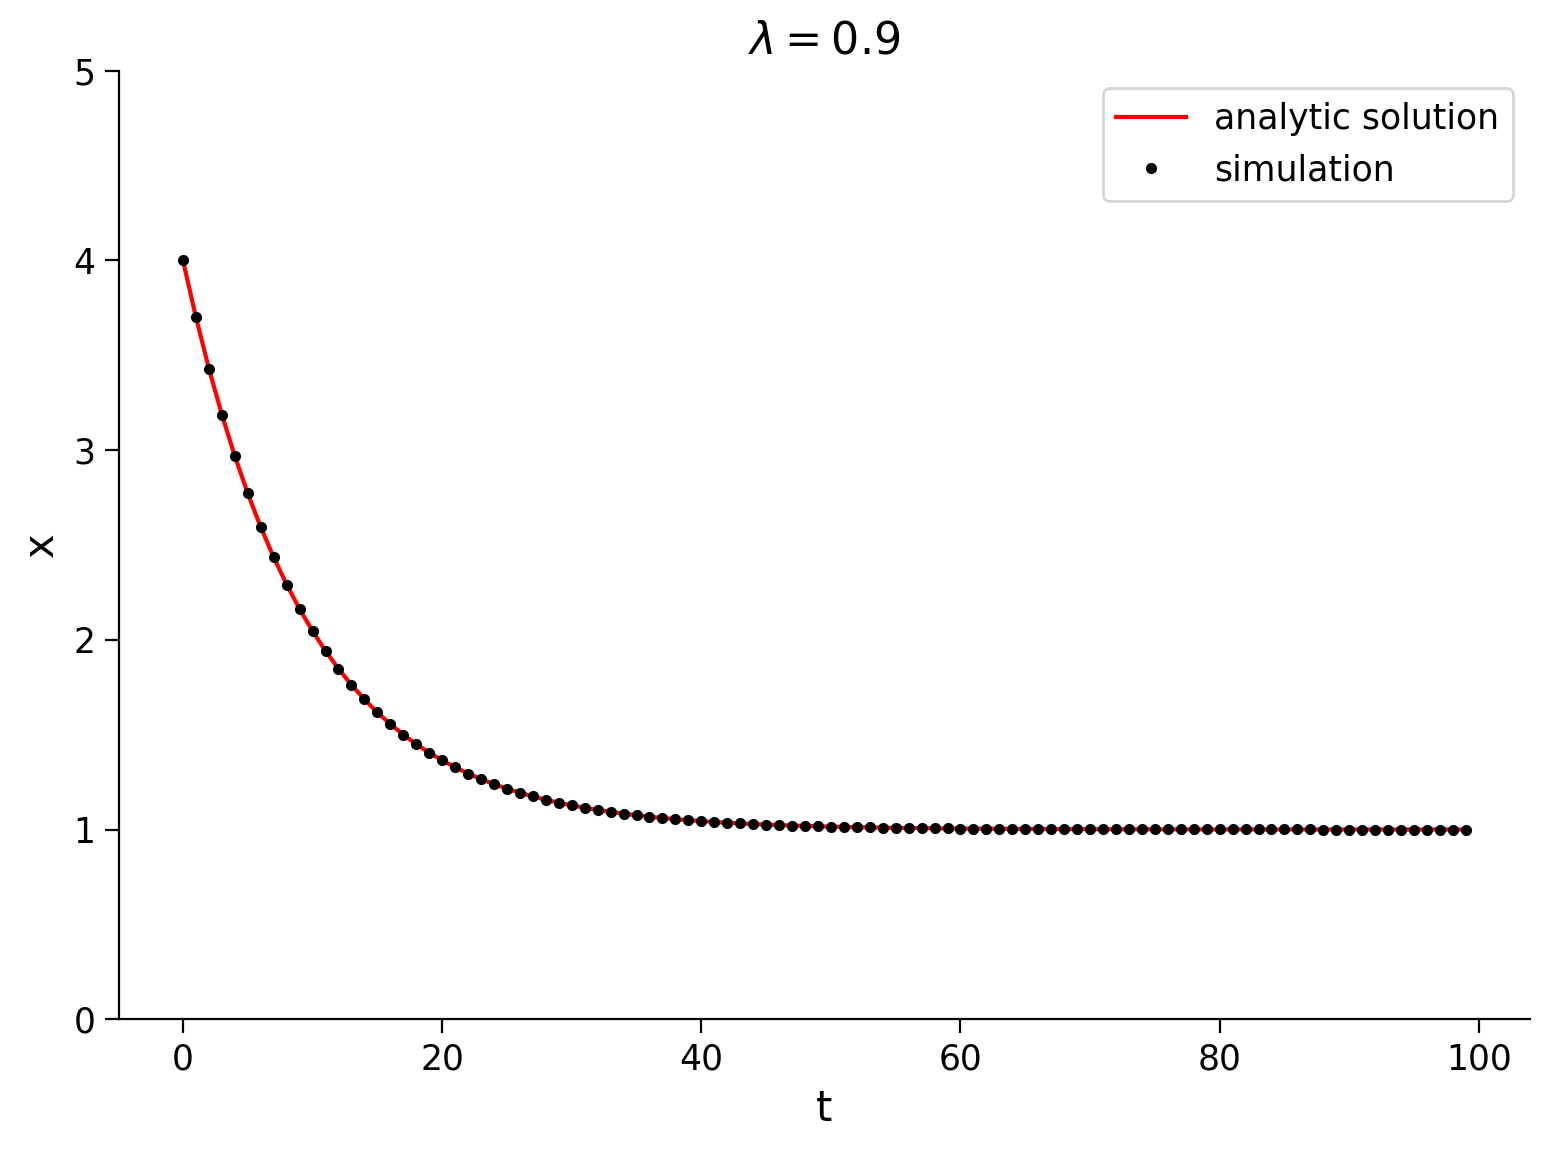

In [36]:
# parameters
lam = 0.9  # decay rate
T = 100  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
  x[k+1] = xinfty + lam * (x[k] - xinfty)

# plot x as it evolves in time
plot_dynamics(x, t, lam, xinfty)

The discrete version of our OU process has the following form:

\begin{equation}
x_{k+1} = x_\infty + \lambda(x_k - x_{\infty}) + \sigma \eta
\end{equation}

where $\eta$ is sampled from a standard normal distribution ($\mu=0, \sigma=1$).

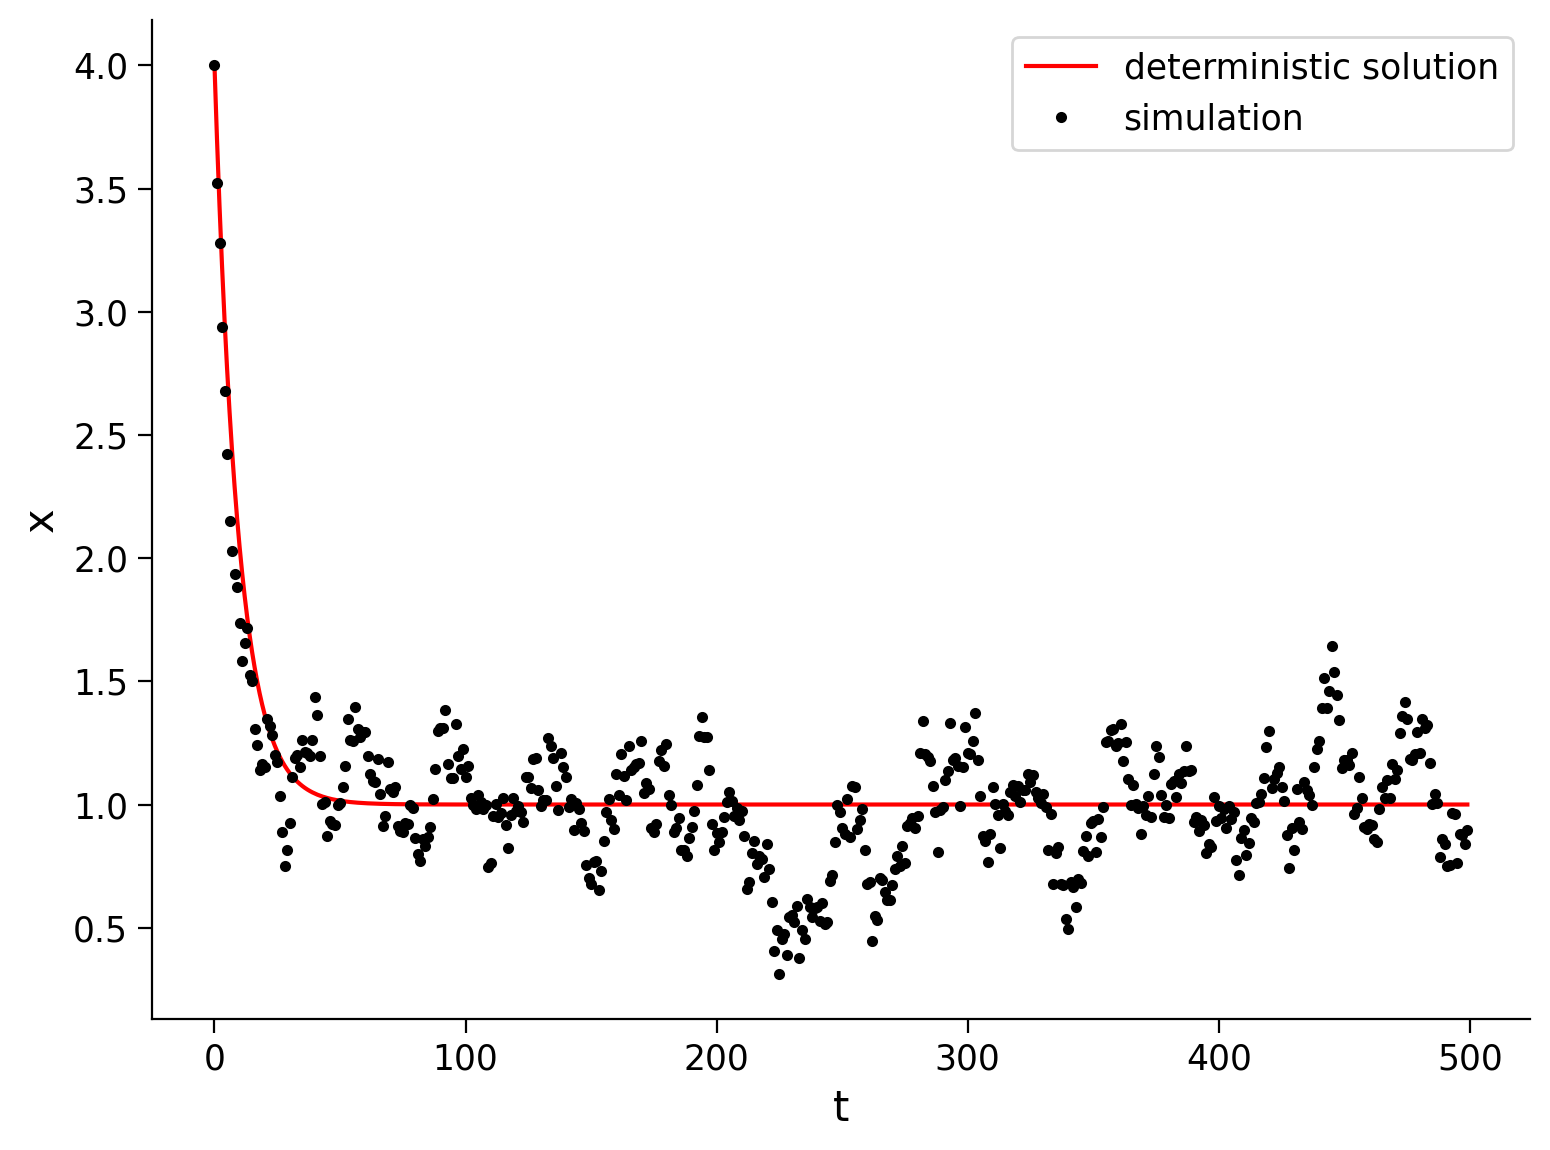

In [37]:
def simulate_ddm(lam, sig, x0, xinfty, T):
  """
  Simulate the drift-diffusion model with given parameters and initial condition.
  Args:
    lam (scalar): decay rate
    sig (scalar): standard deviation of normal distribution
    x0 (scalar): initial condition (x at time 0)
    xinfty (scalar): drift towards convergence in the limit
    T (scalar): total duration of the simulation (in steps)

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # initialize variables
  t = np.arange(0, T, 1.)
  x = np.zeros_like(t)
  x[0] = x0

  # Step through in time
  for k in range(len(t)-1):

    # update x at time k+1 with a deterministic and a stochastic component
    # hint: the deterministic component will be like above, and
    #   the stochastic component is drawn from a scaled normal distribution
    x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.normal(0, 1, 1)

  return t, x


lam = 0.9  # decay rate
sig = 0.1  # standard deviation of diffusive process
T = 500  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# Plot x as it evolves in time
np.random.seed(2020)
t, x = simulate_ddm(lam, sig, x0, xinfty, T)
plot_ddm(t, x, xinfty, lam, x0)

### Section 3: Variance of the OU Process

As we can see, the **mean** of the process follows the solution to the deterministic part of the governing equation. So far, so good!

But what about the **variance**?

Unlike the random walk, because there's a decay process that "pulls" $x$ back towards $x_\infty$, the variance does not grow without bound with large $t$. Instead, when it gets far from $x_\infty$, the position of $x$ is restored, until an equilibrium is reached.

The equilibrium variance for our drift-diffusion system is

\begin{equation}
\text{Var} = \frac{\sigma^2}{1 - \lambda^2}.
\end{equation}

Notice that the value of this equilibrium variance depends on $\lambda$ and $\sigma$. It does not depend on $x_0$ and $x_\infty$.

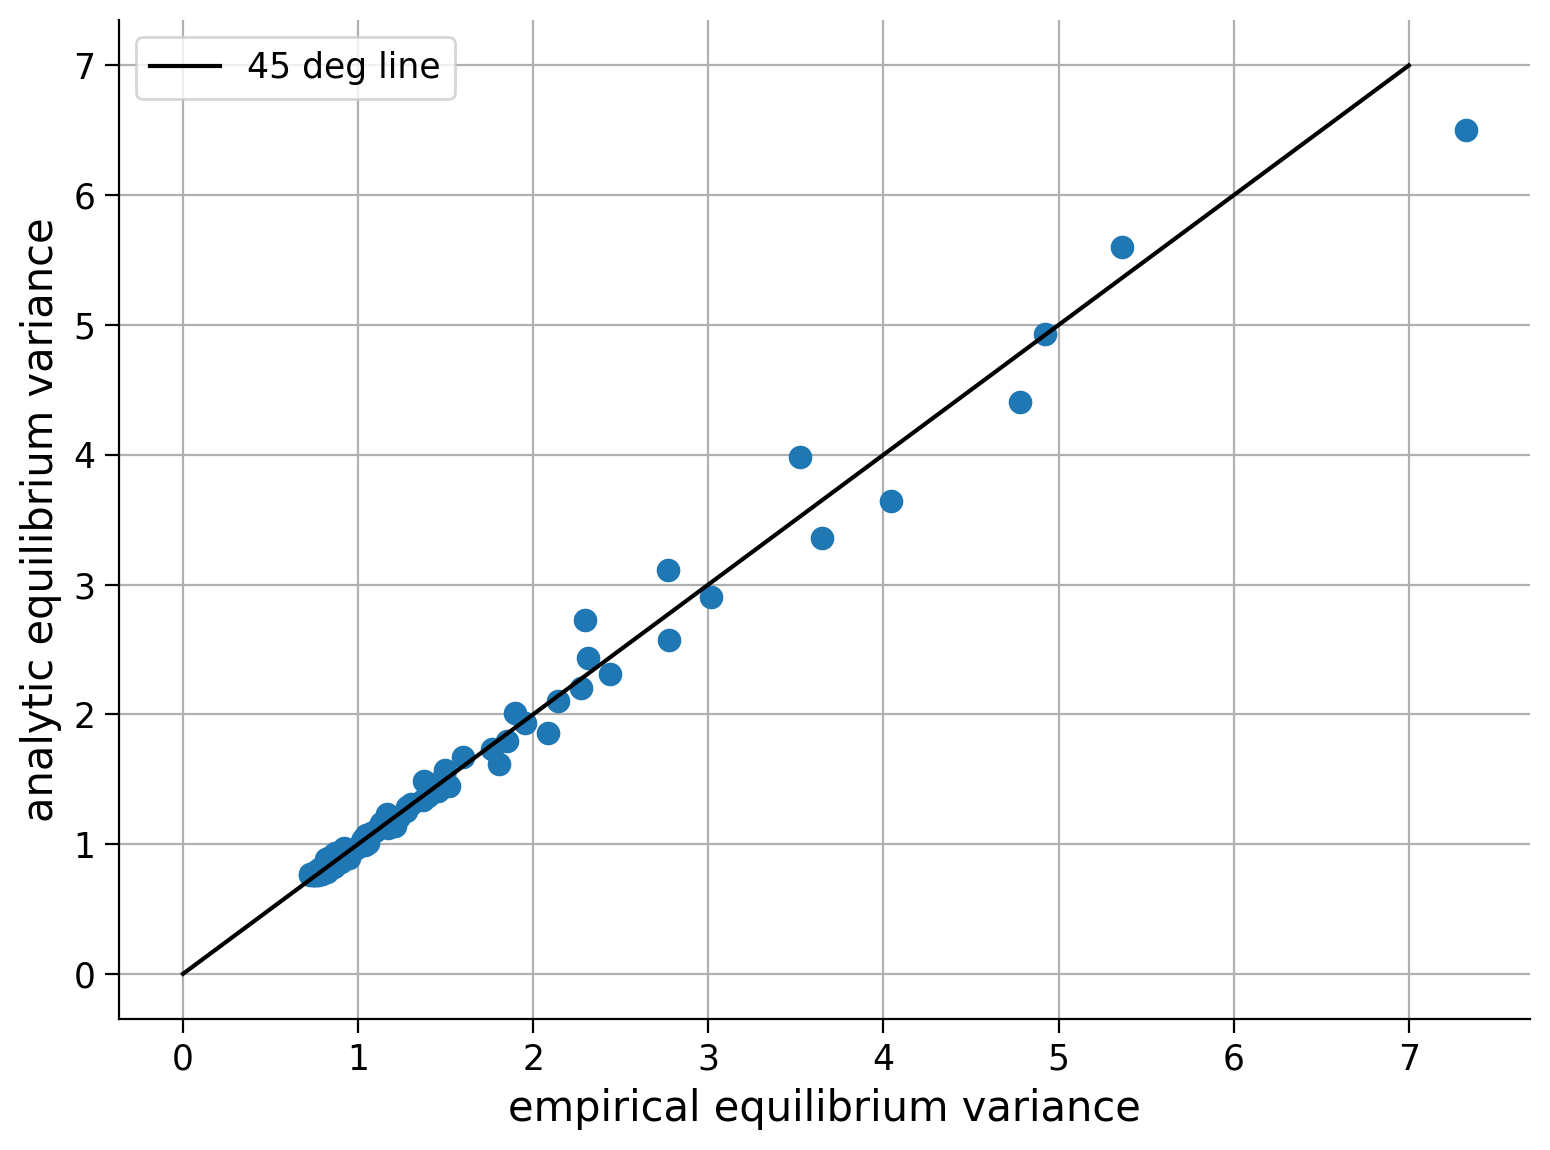

In [38]:
def ddm(T, x0, xinfty, lam, sig):
  t = np.arange(0, T, 1.)
  x = np.zeros_like(t)
  x[0] = x0

  for k in range(len(t)-1):
    x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

  return t, x


# computes equilibrium variance of ddm
# returns variance
def ddm_eq_var(T, x0, xinfty, lam, sig):
  t, x = ddm(T, x0, xinfty, lam, sig)

  # returns variance of the second half of the simulation
  # this is a hack: assumes system has settled by second half
  return x[-round(T/2):].var()


np.random.seed(2020) # set random seed

# sweep through values for lambda
lambdas = np.arange(0.05, 0.95, 0.01)
empirical_variances = np.zeros_like(lambdas)
analytical_variances = np.zeros_like(lambdas)

sig = 0.87

# compute empirical equilibrium variance
for i, lam in enumerate(lambdas):
  empirical_variances[i] = ddm_eq_var(5000, x0, xinfty, lambdas[i], sig)

# Hint: you can also do this in one line outside the loop!
analytical_variances = sig ** 2 / (1 - lambdas ** 2)

# Plot the empirical variance vs analytical variance
var_comparison_plot(empirical_variances, analytical_variances)

## Tutorial 4: Autoregressive Models


The goal of this tutorial is to use the modeling tools and intuitions developed in the previous few tutorials and use them to _fit data_. The concept is to flip the previous tutorial -- instead of generating synthetic data points from a known underlying process, what if we are given data points measured in time and have to learn the underlying process?

In [39]:
def plot_residual_histogram(res):
  """Helper function for Exercise 4A"""
  plt.figure()
  plt.hist(res)
  plt.xlabel('error in linear model')
  plt.title(f'stdev of errors = {res.std():.4f}')
  plt.show()


def plot_training_fit(x1, x2, p):
  """Helper function for Exercise 4B"""
  plt.figure()
  plt.scatter(x2 + np.random.standard_normal(len(x2))*0.02,
              np.dot(x1.T, p), alpha=0.2)
  plt.title(f'Training fit, order {r} AR model')
  plt.xlabel('x')
  plt.ylabel('estimated x')
  plt.show()

In [40]:
def ddm(T, x0, xinfty, lam, sig):
  '''
  Samples a trajectory of a drift-diffusion model.

  args:
  T (integer): length of time of the trajectory
  x0 (float): position at time 0
  xinfty (float): equilibrium position
  lam (float): process param
  sig: standard deviation of the normal distribution

  returns:
  t (numpy array of floats): time steps from 0 to T sampled every 1 unit
  x (numpy array of floats): position at every time step
  '''
  t = np.arange(0, T, 1.)
  x = np.zeros_like(t)
  x[0] = x0

  for k in range(len(t)-1):
      x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

  return t, x

def build_time_delay_matrices(x, r):
    """
    Builds x1 and x2 for regression

    Args:
    x (numpy array of floats): data to be auto regressed
    r (scalar): order of Autoregression model

    Returns:
    (numpy array of floats) : to predict "x2"
    (numpy array of floats) : predictors of size [r,n-r], "x1"

    """
    # construct the time-delayed data matrices for order-r AR model
    x1 = np.ones(len(x)-r)
    x1 = np.vstack((x1, x[0:-r]))
    xprime = x
    for i in range(r-1):
        xprime = np.roll(xprime, -1)
        x1 = np.vstack((x1, xprime[0:-r]))

    x2 = x[r:]

    return x1, x2


def AR_prediction(x_test, p):
    """
    Returns the prediction for test data "x_test" with the regression
    coefficients p

    Args:
    x_test (numpy array of floats): test data to be predicted
    p (numpy array of floats): regression coefficients of size [r] after
    solving the autoregression (order r) problem on train data

    Returns:
    (numpy array of floats): Predictions for test data. +1 if positive and -1
    if negative.
    """
    x1, x2 = build_time_delay_matrices(x_test, len(p)-1)

    # Evaluating the AR_model function fit returns a number.
    # We take the sign (- or +) of this number as the model's guess.
    return np.sign(np.dot(x1.T, p))

def error_rate(x_test, p):
    """
    Returns the error of the Autoregression model. Error is the number of
    mismatched predictions divided by total number of test points.

    Args:
    x_test (numpy array of floats): data to be predicted
    p (numpy array of floats): regression coefficients of size [r] after
    solving the autoregression (order r) problem on train data

    Returns:
    (float): Error (percentage).
    """
    x1, x2 = build_time_delay_matrices(x_test, len(p)-1)

    return np.count_nonzero(x2 - AR_prediction(x_test, p)) / len(x2)

### Section 1: Fitting data to the OU process

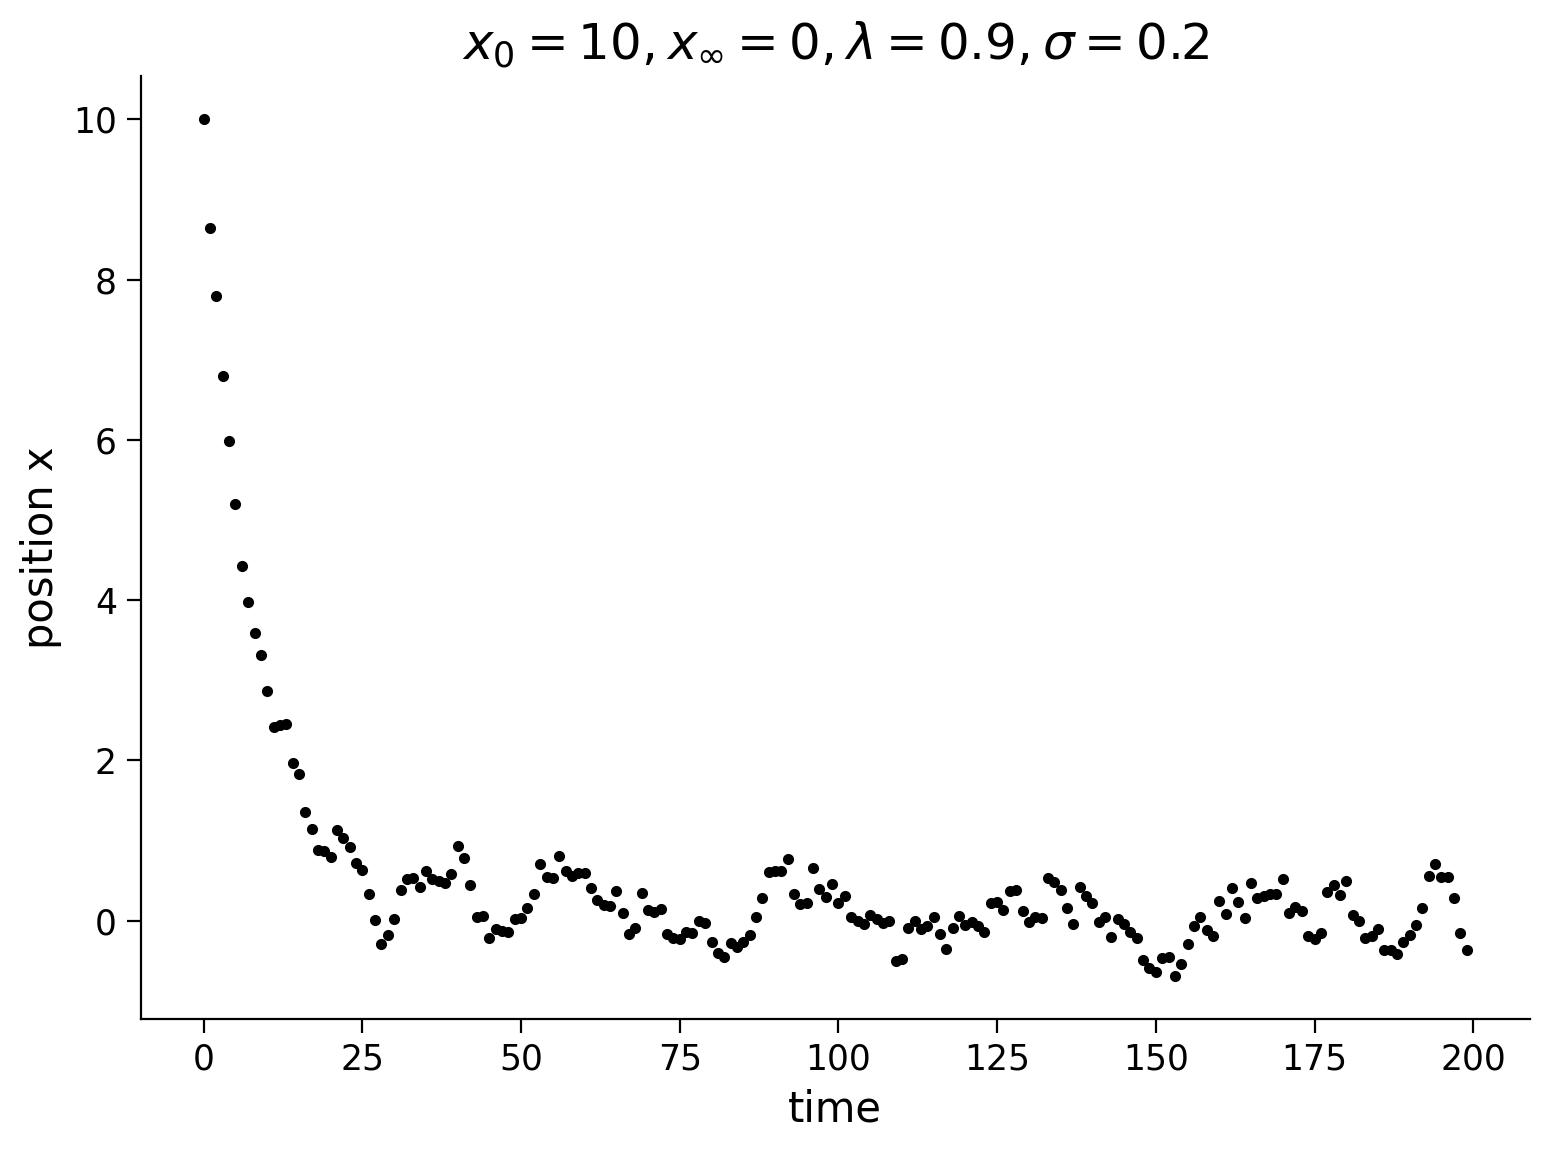

In [42]:
np.random.seed(2020) # set random seed

# parameters
T = 200
x0 = 10
xinfty = 0
lam = 0.9
sig = 0.2

# drift-diffusion model from tutorial 3
t, x = ddm(T, x0, xinfty, lam, sig)

plt.figure()
plt.title('$x_0=%d, x_{\infty}=%d, \lambda=%0.1f, \sigma=%0.1f$' % (x0, xinfty, lam, sig))
plt.plot(t, x, 'k.')
plt.xlabel('time')
plt.ylabel('position x')
plt.show()

What if we were given these positions $x$ as they evolve in time as data, how would we get back out the dynamics of the system $\lambda$?

Since a little bird told us that this system takes on the form

\begin{equation}
x_{k+1} = \lambda x_k + \eta \,,
\end{equation}

where $\eta$ is noise from a normal distribution, our approach is to solve for $\lambda$ as a **regression problem**.

As a check, let's plot every pair of points adjacent in time ($x_{k+1}$ vs. $x_k$) against each other to see if there is a linear relationship between them.

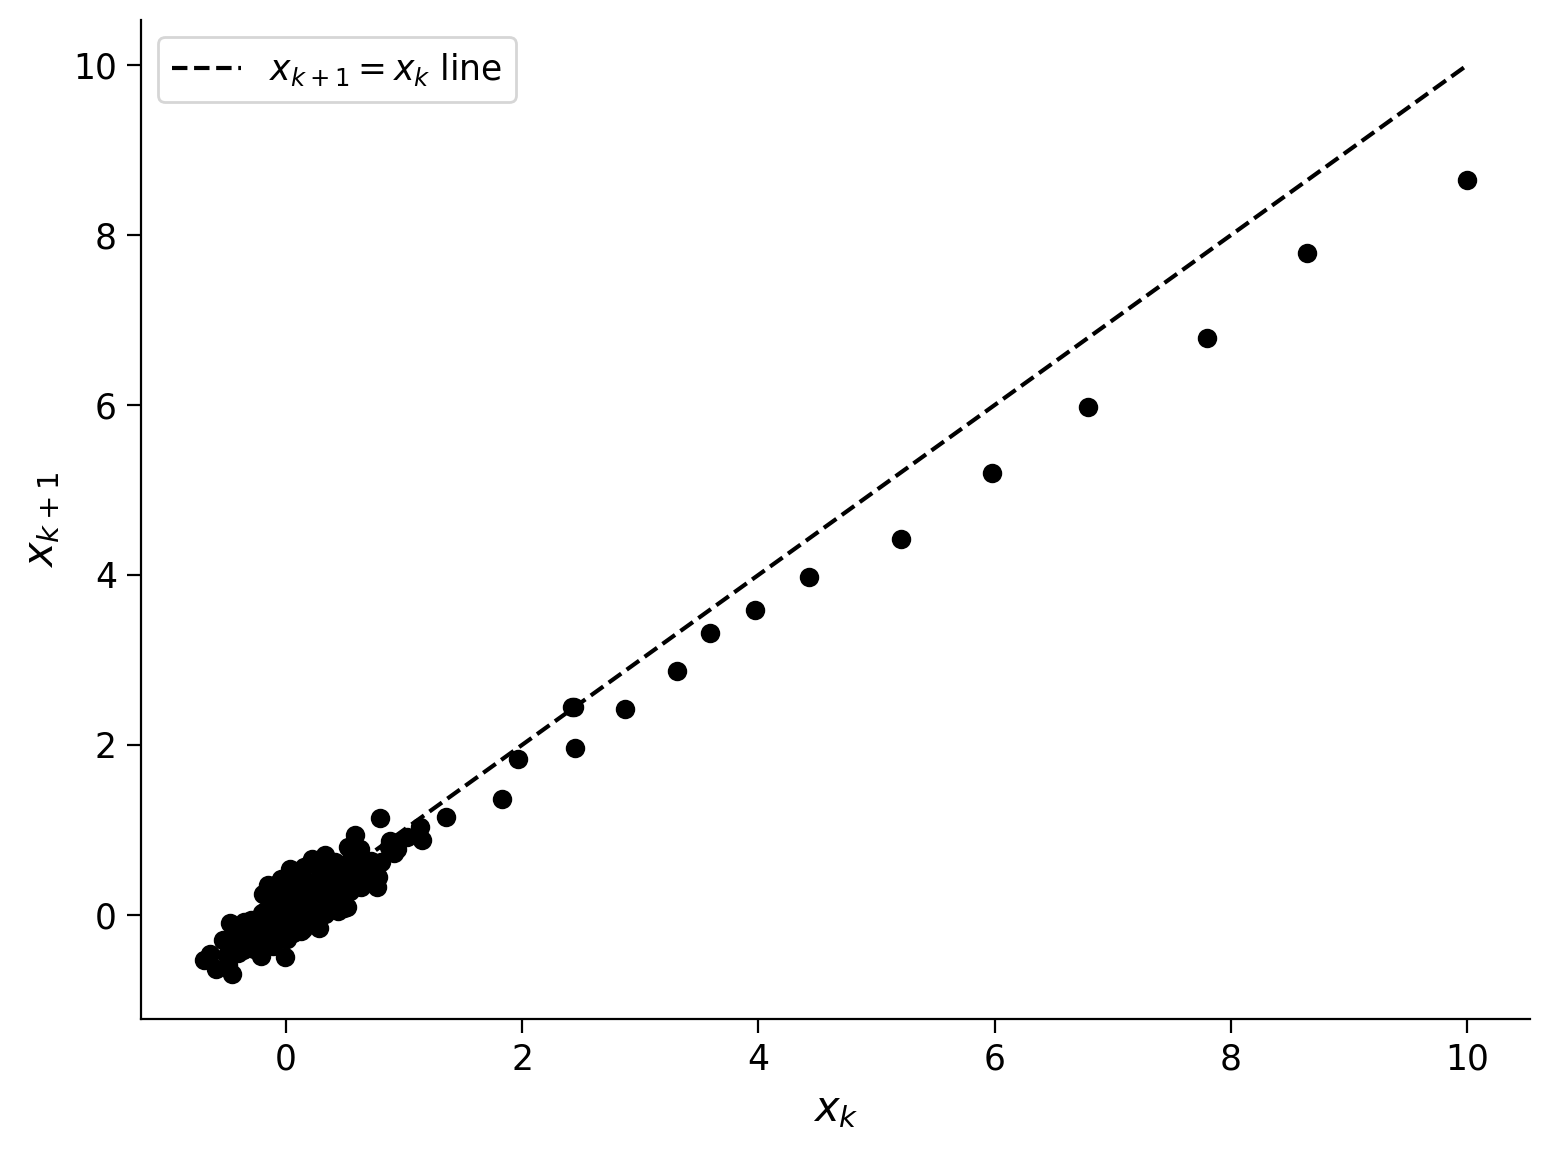

In [43]:
# make a scatter plot of every data point in x
# at time k versus time k+1
plt.figure()
plt.scatter(x[0:-2], x[1:-1], color='k')
plt.plot([0, 10], [0, 10], 'k--', label='$x_{k+1} = x_k$ line')
plt.xlabel('$x_k$')
plt.ylabel('$x_{k+1}$')
plt.legend()
plt.show()

This is evidence that the _dynamics that generated the data_ is **linear**. We can now reformulate this task as a regression problem.

Let $\mathbf{x_1} = x_{0:T-1}$ and $\mathbf{x_2} = x_{1:T}$ be vectors of the data indexed so that they are shifted in time by one. Then, our regression problem is

\begin{equation}
\mathbf{x}_2 = \lambda \mathbf{x}_1
\end{equation}

This model is **autoregressive**, where _auto_ means self. In other words, it's a regression of the time series on itself from the past. The equation as written above is only a function of itself from _one step_ in the past, so we can call it a _first order_ autoregressive model.

Now, let's set up the regression problem below and solve for $\lambda.$ We will plot our data with the regression line to see if they agree.

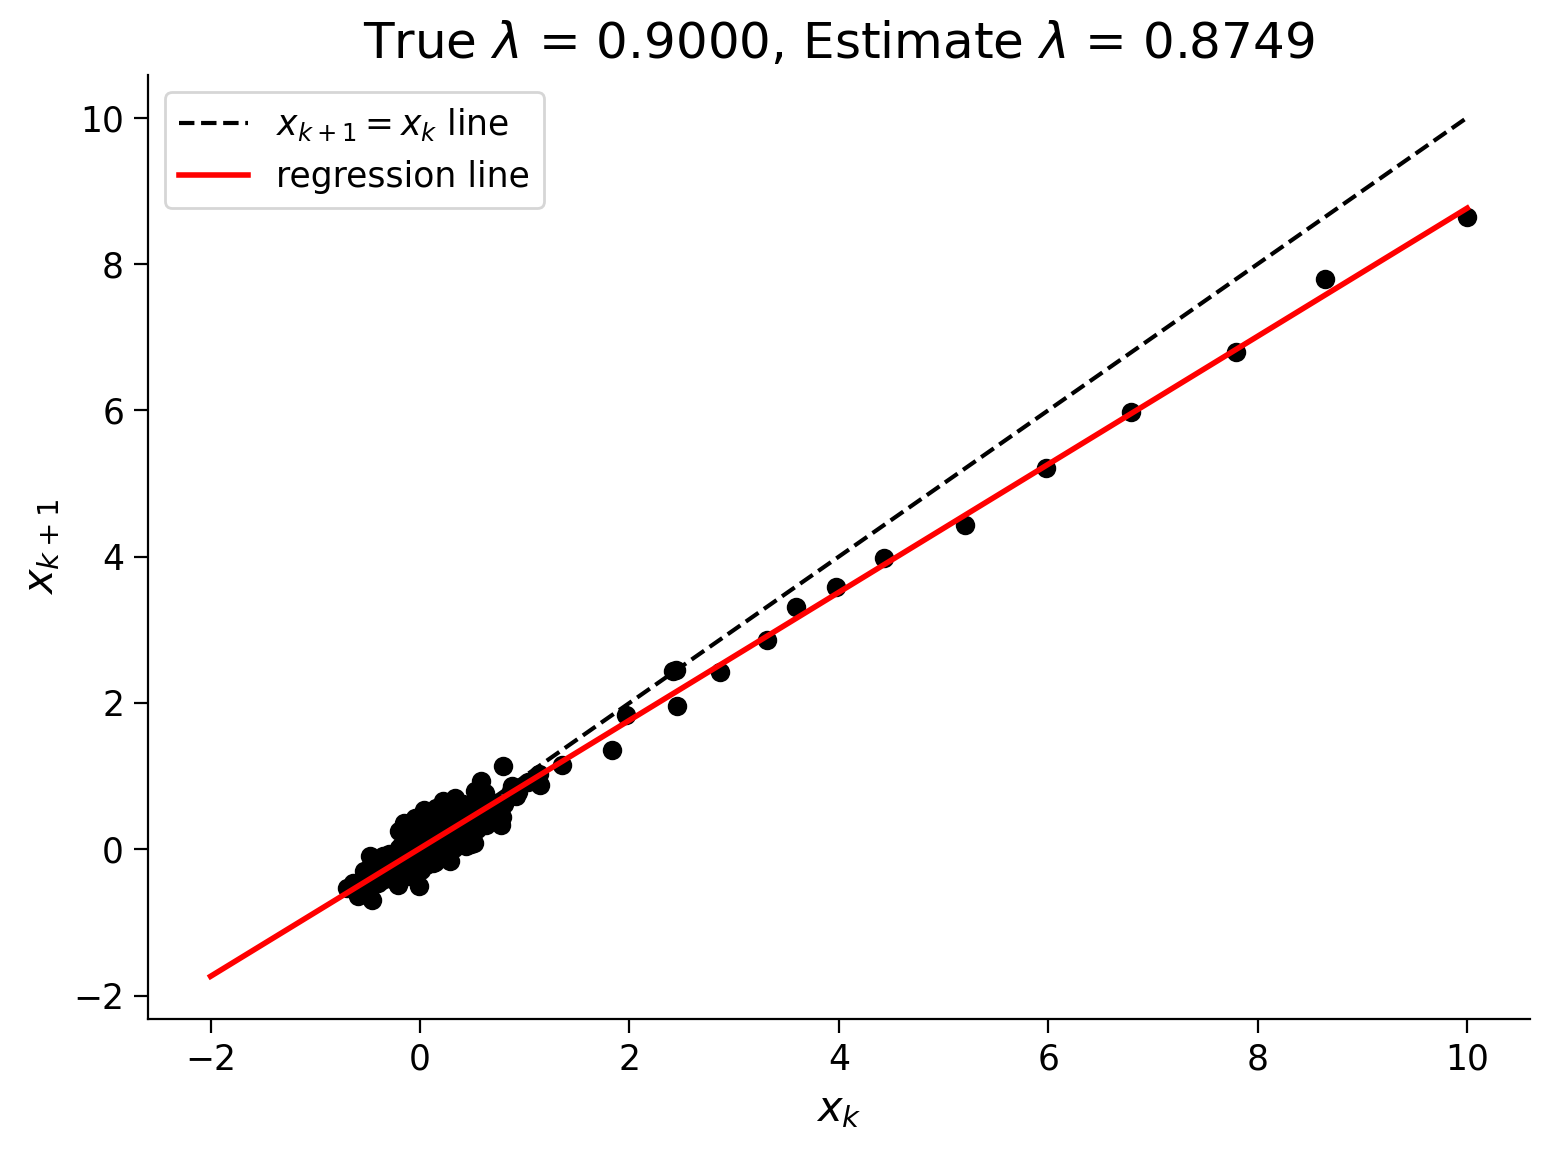

In [44]:
# build the two data vectors from x
x1 = x[0:-2]
x1 = x1[:, np.newaxis]**[0, 1]

x2 = x[1:-1]

# solve for an estimate of lambda as a linear regression problem
p, res, rnk, s = np.linalg.lstsq(x1, x2, rcond=None)

# here we've artificially added a vector of 1's to the x1 array,
# so that our linear regression problem has an intercept term to fit.
# we expect this coefficient to be close to 0.
# the second coefficient in the regression is the linear term:
# that's the one we're after!
lam_hat = p[1]

# plot the data points
fig = plt.figure()
plt.scatter(x[0:-2], x[1:-1], color='k')
plt.xlabel('$x_k$')
plt.ylabel('$x_{k+1}$')

# plot the 45 degree line
plt.plot([0, 10], [0, 10], 'k--', label='$x_{k+1} = x_k$ line')


# plot the regression line on top
xx = np.linspace(-sig*10, max(x), 100)
yy = p[0] + lam_hat * xx
plt.plot(xx, yy, 'r', linewidth=2, label='regression line')

mytitle = 'True $\lambda$ = {lam:.4f}, Estimate $\lambda$ = {lam_hat:.4f}'
plt.title(mytitle.format(lam=lam, lam_hat=lam_hat))
plt.legend()
plt.show()

Now we have a way to predict $x_{k+1}$ if given any data point $x_k$. Let's take a look at how accurate this one-step prediction might be by plotting the residuals.

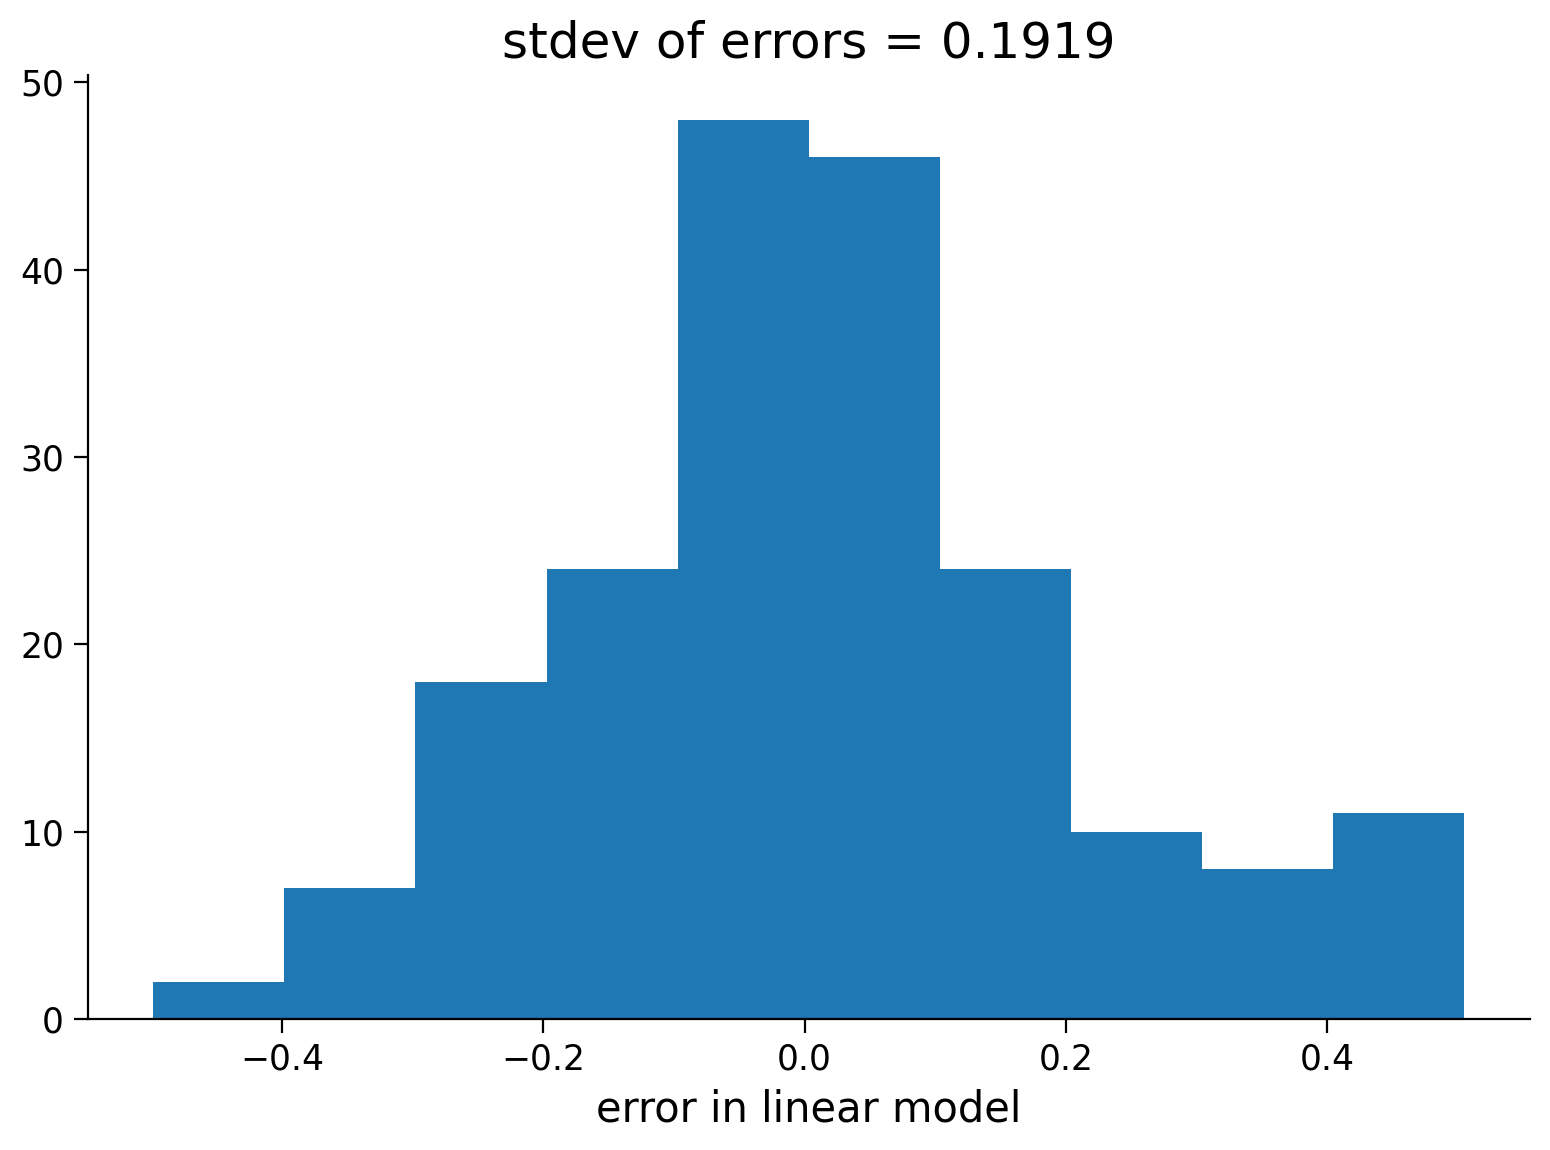

In [46]:
# compute the predicted values using the autoregressive model (lam_hat), and
# the residual is the difference between x2 and the prediction
res = x2 - lam_hat * x[0:-2]

# Visualize
plot_residual_histogram(res)

### Section 2: Higher Order Autoregressive Models

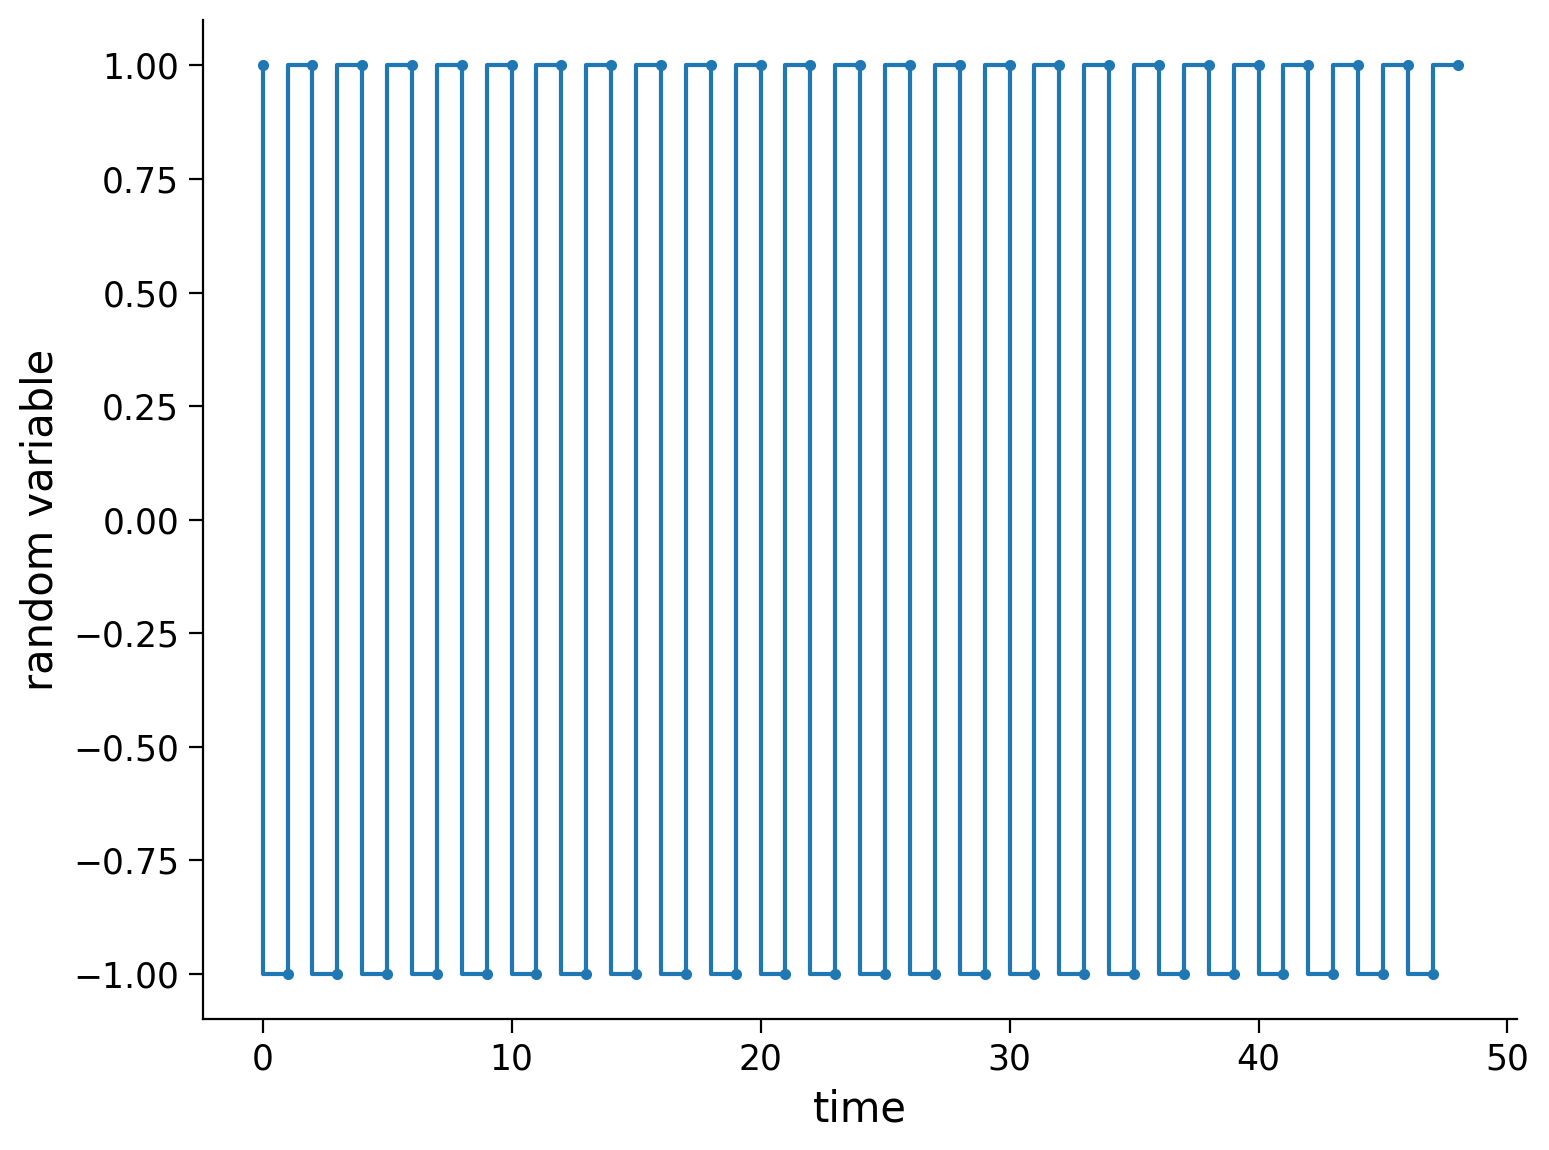

In [47]:
# this sequence is entirely predictable, so an AR model should work
monkey_at_typewriter = '1010101010101010101010101010101010101010101010101'

# Bonus: this sequence is also predictable, but does an order-1 AR model work?
#monkey_at_typewriter = '100100100100100100100100100100100100100'

# function to turn chars to numpy array,
# coding it this way makes the math easier
# '0' -> -1
# '1' -> +1
def char2array(s):
  m = [int(c) for c in s]
  x = np.array(m)
  return x*2 - 1


x = char2array(monkey_at_typewriter)

plt.figure()
plt.step(x, '.-')
plt.xlabel('time')
plt.ylabel('random variable')
plt.show()

In [48]:
# build the two data vectors from x
x1 = x[0:-2]
x1 = x1[:, np.newaxis]**[0, 1]

x2 = x[1:-1]

# solve for an estimate of lambda as a linear regression problem
p, res, rnk, s = np.linalg.lstsq(x1, x2, rcond=None)

# take a look at the resulting regression coefficients
print(f'alpha_0 = {p[0]:.2f}, alpha_1 = {p[1]:.2f}')

alpha_0 = -0.00, alpha_1 = -1.00


To test out an application of higher-order AR models, let's use them to **model a sequence of 0's and 1's that a human tried to produce at random**. In particular, I convinced my 9-yr-old monkey to sit at a typewriter (my laptop) and enter some digits as randomly as he is able. The digits he typed in are in the code, and we can plot them as a time series of digits here.

If the digits really have no structure, then we expect our model to do about as well as guessing, producing an error rate of 0.5. Let's see how well we can do!

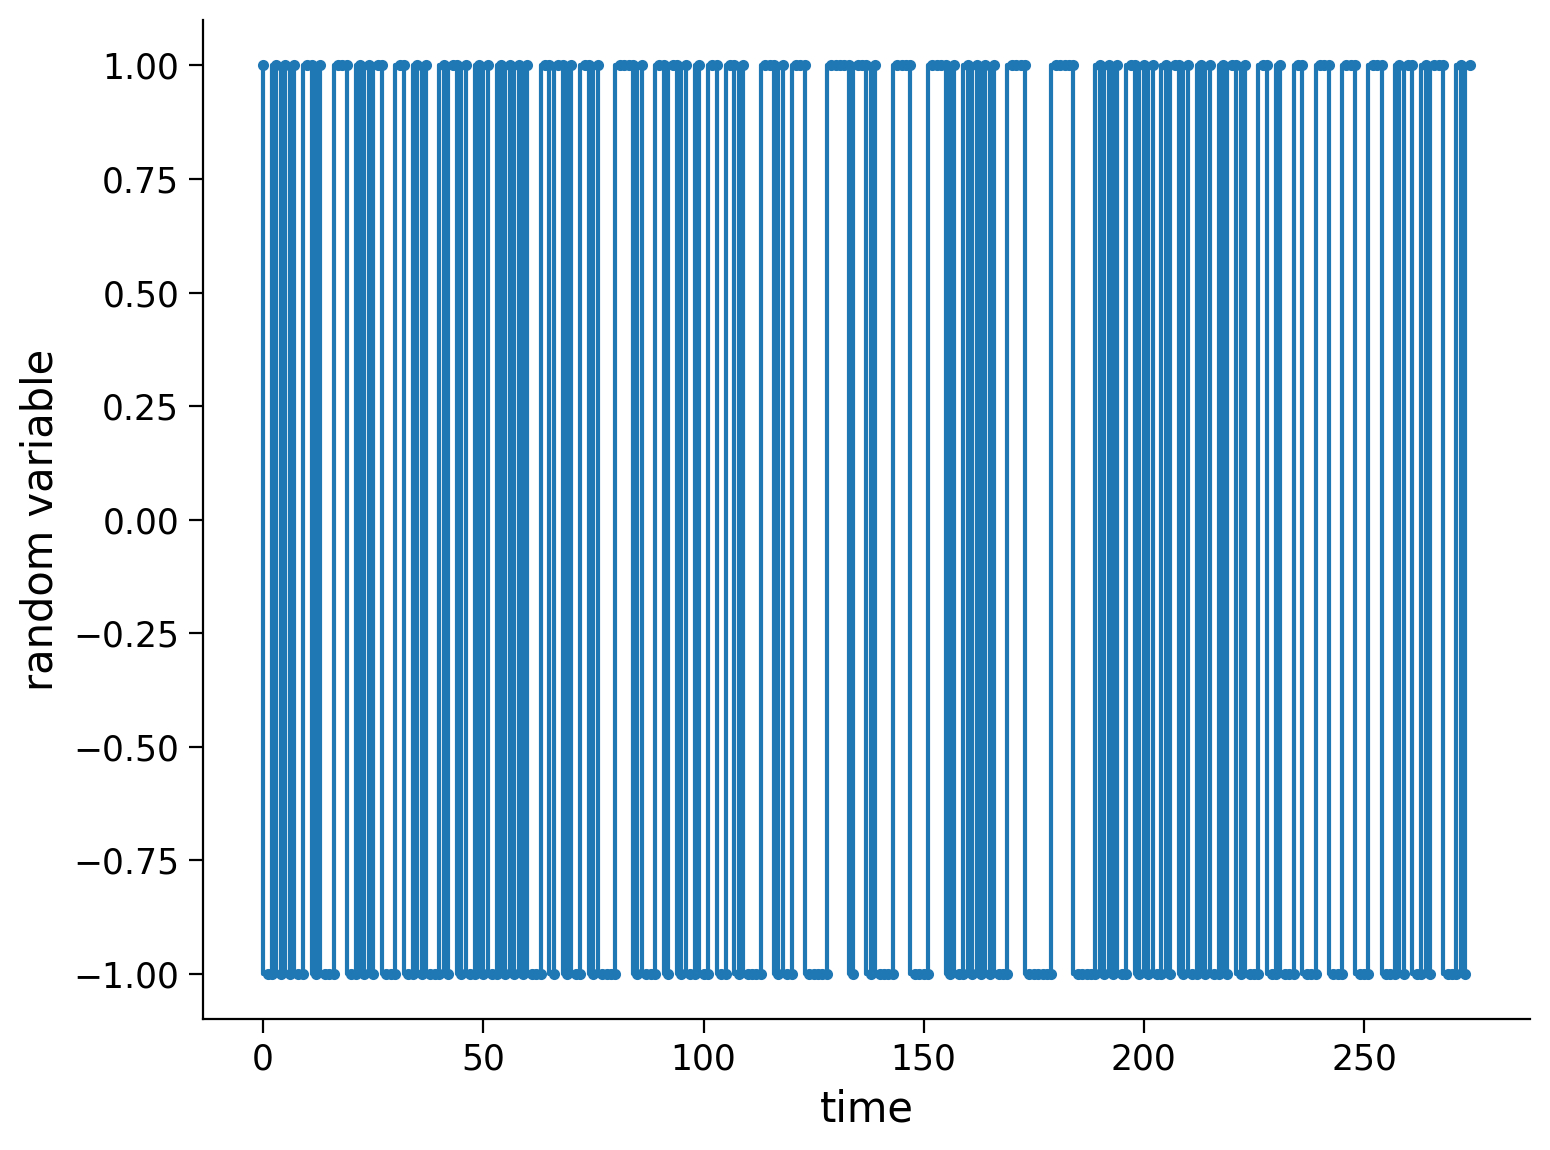

In [49]:
# data generated by 9-yr-old JAB:
# we will be using this sequence to train the data
monkey_at_typewriter = '10010101001101000111001010110001100101000101101001010010101010001101101001101000011110100011011010010011001101000011101001110000011111011101000011110000111101001010101000111100000011111000001010100110101001011010010100101101000110010001100011100011100011100010110010111000101'

# we will be using this sequence to test the data
test_monkey = '00100101100001101001100111100101011100101011101001010101000010110101001010100011110'

x = char2array(monkey_at_typewriter)
test = char2array(test_monkey)

## testing: machine generated randint should be entirely unpredictable
## uncomment the lines below to try random numbers instead
# np.random.seed(2020) # set random seed
# x = char2array(np.random.randint(2, size=500))
# test = char2array(np.random.randint(2, size=500))

plt.figure()
plt.step(x, '.-')
plt.xlabel('time')
plt.ylabel('random variable')
plt.show()

In [51]:
# @markdown Execute this cell to get helper function `AR_model`

def AR_model(x, r):
    """
    Solves Autoregression problem of order (r) for x

    Args:
    x (numpy array of floats): data to be auto regressed
    r (scalar): order of Autoregression model

    Returns:
    (numpy array of floats) : to predict "x2"
    (numpy array of floats) : predictors of size [r,n-r], "x1"
    (numpy array of floats): coefficients of length [r] for prediction after
    solving the regression problem "p"
    """
    x1, x2 = build_time_delay_matrices(x, r)

    # solve for an estimate of lambda as a linear regression problem
    p, res, rnk, s = np.linalg.lstsq(x1.T, x2, rcond=None)

    return x1, x2, p

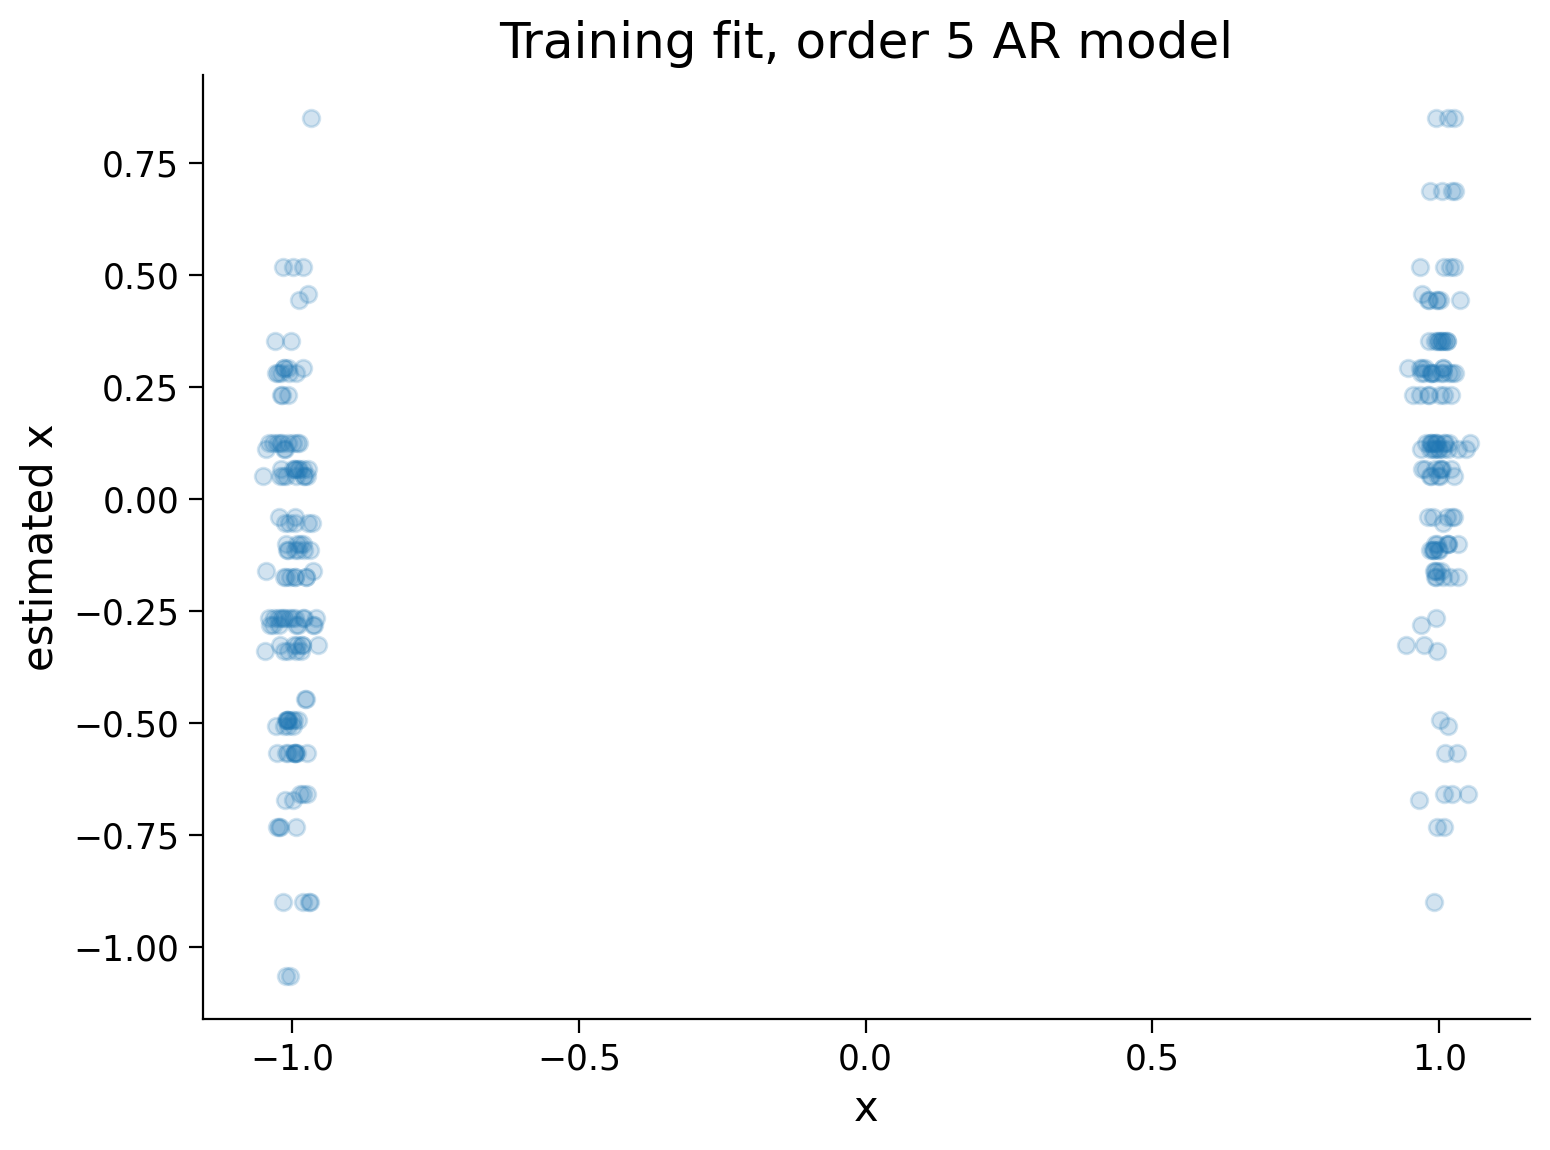

In [52]:
# define the model order, and use AR_model() to generate the model and prediction
r = 5
x1, x2, p = AR_model(x, r)

# Plot the Training data fit
# Note that this adds a small amount of jitter to horizontal axis for visualization purposes
plot_training_fit(x1, x2, p)

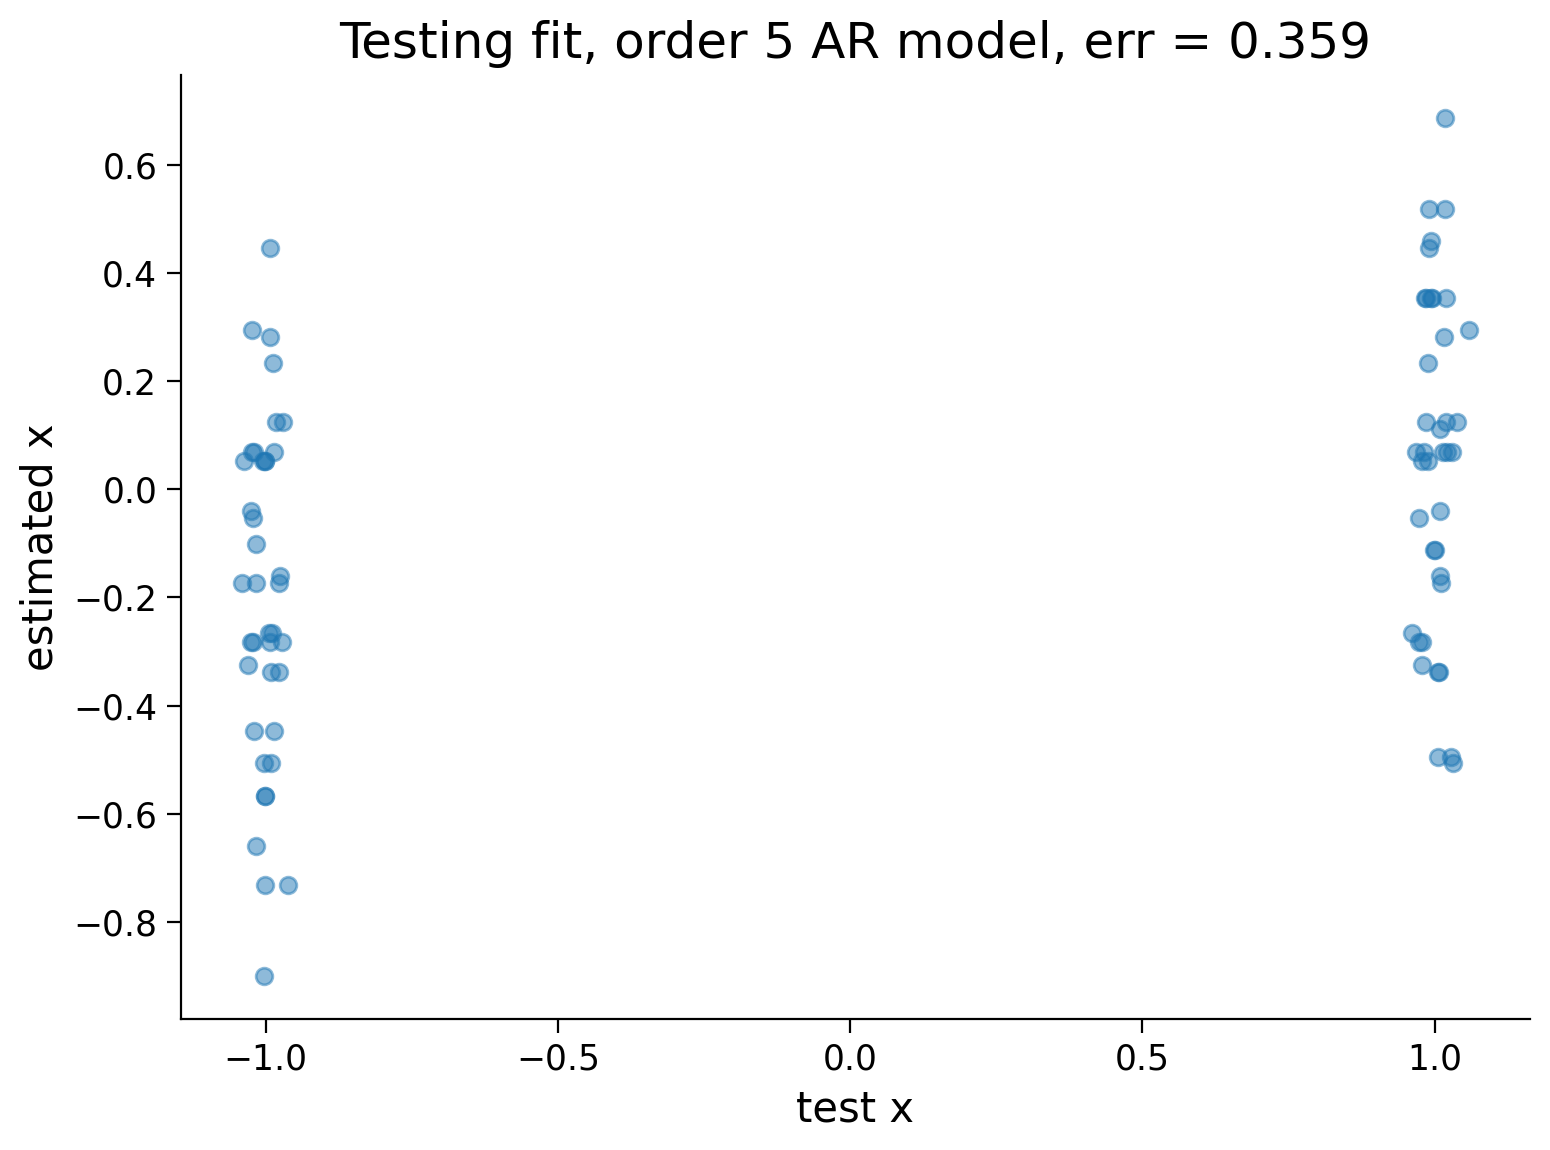

In [54]:
x1_test, x2_test = build_time_delay_matrices(test, r)
plt.figure()
plt.scatter(x2_test+np.random.standard_normal(len(x2_test))*0.02,
            np.dot(x1_test.T, p), alpha=0.5)
mytitle = f'Testing fit, order {r} AR model, err = {error_rate(test, p):.3f}'
plt.title(mytitle)
plt.xlabel('test x')
plt.ylabel('estimated x')
plt.show()

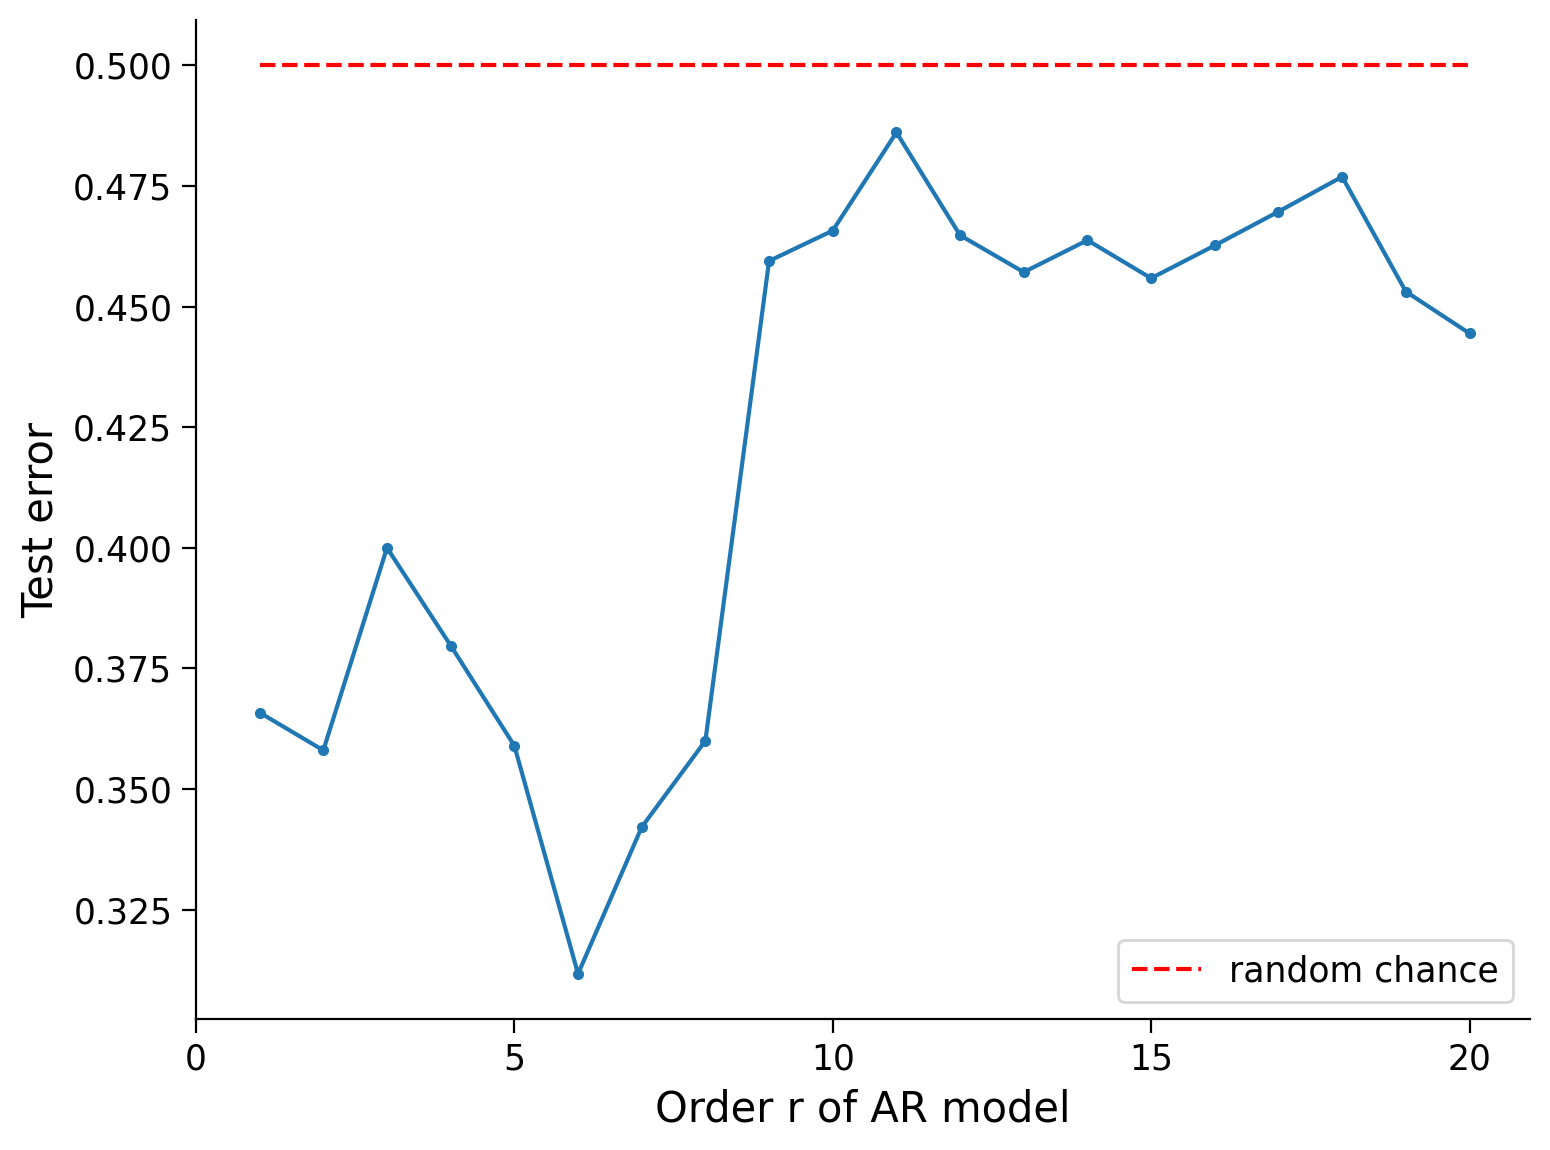

In [56]:
# range of r's to try
r = np.arange(1, 21)
err = np.ones_like(r) * 1.0

for i, rr in enumerate(r):
  # fitting the model on training data
  x1, x2, p = AR_model(x, rr)
  # computing and storing the test error
  test_error = error_rate(test, p)
  err[i] = test_error


plt.figure()
plt.plot(r, err, '.-')
plt.plot([1, r[-1]], [0.5, 0.5], 'r--', label='random chance')
plt.xlabel('Order r of AR model')
plt.ylabel('Test error')
plt.xticks(np.arange(0,25,5))
plt.legend()
plt.show()